In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

In [152]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [153]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [154]:
#Mean Absolute Percentage Error 

def get_MAPE(actual, forecasted):
    return np.round(np.mean(np.abs((actual-forecasted))/actual)*100,2)

In [155]:
Exp_data = pd.read_csv('../input/gcpiot/mar_sep_min.csv', header = 0)

In [156]:
Exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292321 entries, 0 to 292320
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            292321 non-null  int64  
 1   Property_num  292321 non-null  object 
 2   Temp          292321 non-null  int64  
 3   noted_Date    292321 non-null  object 
 4   Status        292321 non-null  object 
 5   Humidity      292321 non-null  float64
 6   Dust          292321 non-null  int64  
 7   CO2_level     292321 non-null  float64
 8   room_id       292321 non-null  object 
 9   Floor_Number  292321 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 22.3+ MB


In [157]:
Exp_data.rename(columns={'Property_num': 'Property num','noted_Date':'noted Date','CO2_level':'CO2 level'}, inplace = True)

In [158]:
min(Exp_data['Temp'] ), max(Exp_data['Temp'] )

(35, 49)

In [159]:
Exp_data[Exp_data['Property num']=='B1'].head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number
5,6,B1,49,2022-03-01 00:05:00,out,39.31,2,409.37,FL3_RM3,3
7,8,B1,36,2022-03-01 00:07:00,out,20.27,2,420.69,FL2_RM4,2
8,9,B1,43,2022-03-01 00:08:00,out,11.88,4,435.70,FL3_RM3,3
14,15,B1,35,2022-03-01 00:14:00,out,68.05,2,372.07,FL4_RM1,4
17,18,B1,44,2022-03-01 00:17:00,out,-15.20,3,415.25,FL1_RM1,1


In [160]:
len(Exp_data)

292321

In [161]:
Exp_data['Property num'].dtype

dtype('O')

In [162]:
Exp_data['noted Date'] = pd.to_datetime(Exp_data['noted Date'])

In [163]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4


In [164]:
Exp_data['date'] = Exp_data['noted Date'].dt.date
Exp_data['time'] = Exp_data['noted Date'].dt.time
Exp_data['day'] = Exp_data['noted Date'].dt.day
Exp_data['month'] = Exp_data['noted Date'].dt.month


In [165]:
max(Exp_data['date'])

datetime.date(2022, 9, 20)

In [166]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [167]:
Data_recorded = pd.DataFrame(Exp_data.groupby(['Property num','room_id','Temp']).agg({'Temp':'count'}))
Data_recorded.head(15)

Temp
Property num room_id Temp      
B1           FL1_RM1 35     318
                     36     315
                     37     289
                     38     341
                     39     307
                     40     280
                     41     300
                     42     304
                     43     322
                     44     273
                     45     293
                     46     278
                     47     308
                     48     313
                     49     294

In [168]:
min(Exp_data['CO2 level'] ), max(Exp_data['CO2 level'] )

(350.09000082653614, 449.9998295391763)

In [169]:
Exp_data['noted Date'] = pd.to_datetime(Exp_data['noted Date'])

In [170]:
Exp_data['date'] = Exp_data['noted Date'].dt.date
Exp_data['time'] = Exp_data['noted Date'].dt.time
Exp_data['day'] = Exp_data['noted Date'].dt.day
Exp_data['month'] = Exp_data['noted Date'].dt.month

In [171]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [172]:
temp_data = Exp_data[['Property num','room_id','date','Temp']]

In [173]:
temp_data['date']=temp_data['date'].apply(pd.to_datetime)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Taking data of Property num: 'B2', room_id: 'FL3_RM4'

In [174]:
rm_4 = temp_data[(temp_data['Property num']=='B2') & (temp_data['room_id']=='FL3_RM4')]
rm_4.head()

,Property num,room_id,date,Temp
23,B2,FL3_RM4,2022-03-01,44
40,B2,FL3_RM4,2022-03-01,38
62,B2,FL3_RM4,2022-03-01,47
125,B2,FL3_RM4,2022-03-01,44
180,B2,FL3_RM4,2022-03-01,36


In [175]:
max(rm_4['date'])

Timestamp('2022-09-19 00:00:00')

In [176]:
rm_4_avg = pd.DataFrame(rm_4.groupby('date').agg({'Temp':'mean'}).reset_index())
rm_4_avg.dtypes

date    datetime64[ns]
Temp           float64
dtype: object

## Taking june & july month co2 values for rm_4_avg

In [177]:
pd.set_option('display.max_rows',None)

In [178]:
rm_4_july = rm_4_avg[(rm_4_avg['date']>='2022-06-01')& (rm_4_avg['date']<='2022-07-31')].reset_index()
rm_4_july .drop('index',axis=1,inplace=True)

In [179]:
rm_4_july

,date,Temp
0,2022-06-01,42.50
1,2022-06-02,40.95
2,2022-06-03,42.04
3,2022-06-04,42.18
4,2022-06-05,42.05
5,2022-06-06,40.77
6,2022-06-07,41.74
7,2022-06-08,43.10
8,2022-06-09,43.18
9,2022-06-10,42.71


In [180]:
min(rm_4_july['Temp']),max(rm_4_july['Temp']),np.mean(rm_4_july['Temp'])

(39.5, 44.111111111111114, 42.01598576433867)

### Anomaly creation

In [181]:
rm_4_july['new_temp'] = rm_4_july['Temp']
rm_4_july.loc[4:5,'new_temp'] = rm_4_july.loc[4:5,'Temp'] *1.35
rm_4_july.loc[15,'new_temp'] = rm_4_july.loc[15,'Temp'] *0.6
rm_4_july.loc[30,'new_temp'] = rm_4_july.loc[30,'Temp'] *0.6
rm_4_july.loc[35,'new_temp'] = rm_4_july.loc[35,'Temp'] *1.35
rm_4_july.loc[47:48,'new_temp'] = rm_4_july.loc[47:48,'Temp'] *1.35
rm_4_july.loc[56,'new_temp'] = rm_4_july.loc[55,'Temp'] *0.6

In [182]:
rm_4_july['anomaly'] = np.where(rm_4_july['Temp']==rm_4_july['new_temp'], 0,1) 

In [183]:
rm_4_july.head(10)

,date,Temp,new_temp,anomaly
0,2022-06-01,42.50,42.50,0
1,2022-06-02,40.95,40.95,0
2,2022-06-03,42.04,42.04,0
3,2022-06-04,42.18,42.18,0
4,2022-06-05,42.05,56.77,1
5,2022-06-06,40.77,55.04,1
6,2022-06-07,41.74,41.74,0
7,2022-06-08,43.10,43.10,0
8,2022-06-09,43.18,43.18,0
9,2022-06-10,42.71,42.71,0


In [184]:
anomaly = rm_4_july[rm_4_july['anomaly']==1]

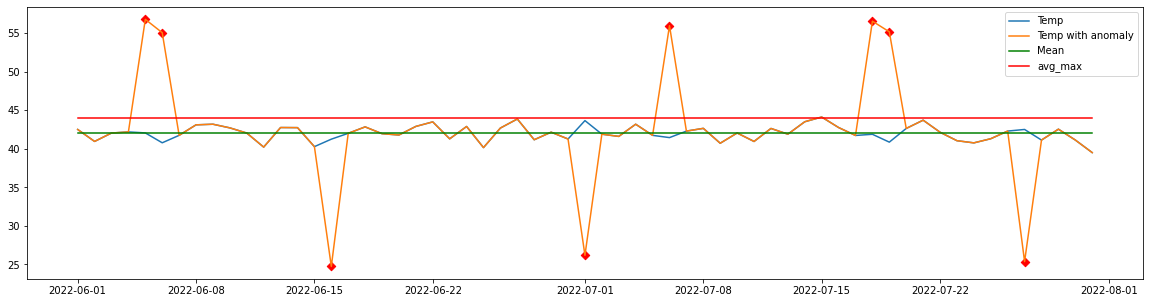

In [185]:
plt.figure(figsize=(20,5))
plt.plot(rm_4_july['date'],rm_4_july['Temp'], label='Temp')
plt.plot(rm_4_july['date'],rm_4_july['new_temp'], label = 'Temp with anomaly')

plt.plot(rm_4_july['date'],([42.1]*len(rm_4_july)), '-', color = 'green', label='Mean') 
plt.plot(rm_4_july['date'],([44.05]*len(rm_4_july)), '-', color = 'red', label='avg_max') 
    
#     Anomalies
plt.scatter(anomaly['date'], anomaly['new_temp'], color='r', marker='D')
plt.legend()
plt.show()

## Simple Exponential Smoothening

In [186]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(rm_4_july['new_temp'])

fit_model = model.fit(smoothing_level=0.4, optimized=False)

In [187]:
fit_model.fittedvalues

0    42.50
1    42.50
2    41.88
3    41.94
4    42.04
5    47.93
6    50.78
7    47.16
8    45.54
9    44.59
10   43.84
11   43.12
12   41.96
13   42.27
14   42.46
15   41.58
16   34.85
17   37.71
18   39.76
19   40.64
20   41.09
21   41.81
22   42.48
23   42.00
24   42.36
25   41.47
26   41.96
27   42.72
28   42.10
29   42.12
30   41.78
31   35.54
32   38.08
33   39.49
34   40.96
35   41.27
36   47.14
37   45.20
38   44.18
39   42.79
40   42.49
41   41.87
42   42.18
43   42.06
44   42.64
45   43.23
46   43.04
47   42.51
48   48.12
49   50.93
50   47.61
51   46.05
52   44.49
53   43.11
54   42.17
55   41.82
56   42.01
57   35.36
58   37.66
59   39.61
60   40.22
dtype: float64

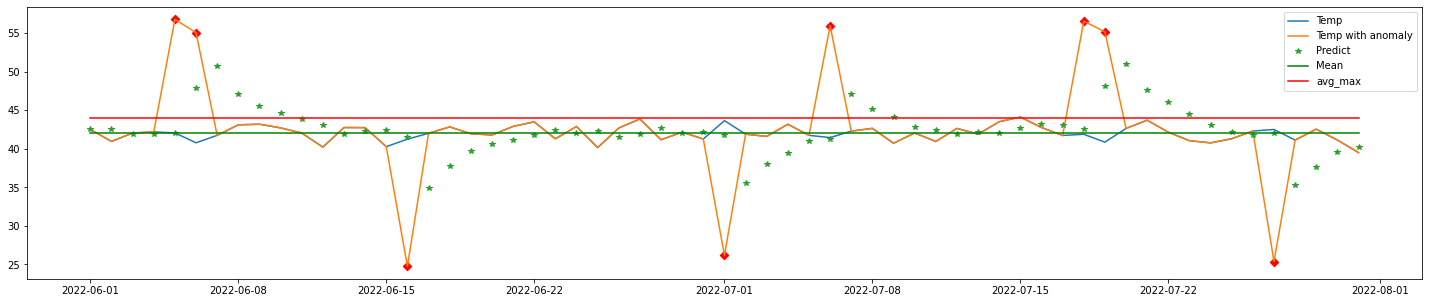

In [188]:
plt.figure(figsize=(25,5))
plt.plot(rm_4_july['date'],rm_4_july['Temp'], label='Temp')
plt.plot(rm_4_july['date'],rm_4_july['new_temp'], label = 'Temp with anomaly')
plt.plot(rm_4_july['date'],fit_model.fittedvalues, '*', label='Predict') 


plt.plot(rm_4_july['date'],([42.1]*len(rm_4_july)), '-', color = 'green', label='Mean') 
plt.plot(rm_4_july['date'],([44.05]*len(rm_4_july)), '-', color = 'red', label='avg_max') 
    
#     Anomalies
plt.scatter(anomaly['date'], anomaly['new_temp'], color='r', marker='D')
plt.legend()
plt.show()

In [189]:
#Mean Absolute Percentage Error - % of error with exponential model 
get_MAPE(rm_4_july['new_temp'].values,fit_model.fittedvalues)

9.75

In [190]:
# Root Mean Squeare Error - Standard Deviation of errors 

np.sqrt(mean_squared_error(rm_4_july['new_temp'].values,fit_model.fittedvalues))

5.812498195644975

In [191]:
rm_4_july['Pred_CO2'] = fit_model.fittedvalues

In [192]:
rm_4_july.tail(8)

,date,Temp,new_temp,anomaly,Pred_CO2
53,2022-07-24,40.76,40.76,0,43.11
54,2022-07-25,41.30,41.30,0,42.17
55,2022-07-26,42.29,42.29,0,41.82
56,2022-07-27,42.50,25.37,1,42.01
57,2022-07-28,41.12,41.12,0,35.36
58,2022-07-29,42.54,42.54,0,37.66
59,2022-07-30,41.13,41.13,0,39.61
60,2022-07-31,39.50,39.50,0,40.22


In [193]:
forecast_val = fit_model.forecast(10)

In [194]:
forecast_val

61   39.93
62   39.93
63   39.93
64   39.93
65   39.93
66   39.93
67   39.93
68   39.93
69   39.93
70   39.93
dtype: float64

In [195]:
def component_avg(df, component):
    return pd.DataFrame(df.groupby('date').agg({component:'mean'}).reset_index())
    

In [196]:
df_av = component_avg(Exp_data, 'Temp')
df_av.columns

Index(['date', 'Temp'], dtype='object')

In [197]:
len(df_av)

204

In [198]:
df_av.tail()

,date,Temp
199,2022-09-16,42.04
200,2022-09-17,41.93
201,2022-09-18,42.12
202,2022-09-19,42.16
203,2022-09-20,47.00


In [199]:
component = 'Temp'
new_var = 'new_'+ component
new_var


'new_Temp'

In [200]:
def anomaly_creation(df, component):
    new_var = 'new_'+ component
    if component == 'Temp':
        df[new_var] = df[component]
        df.loc[4,new_var] = df.loc[4,component] *1.1
        df.loc[5,new_var] = df.loc[5,component] *1.14
        df.loc[6,new_var] = df.loc[6,component] *1.18
        df.loc[7,new_var] = df.loc[7,component] *1.25
        df.loc[8,new_var] = df.loc[8,component] *1.3
        df.loc[9,new_var] = df.loc[9,component] *1.28
        df.loc[10,new_var] = df.loc[10,component] *1.29
        df.loc[11,new_var] = df.loc[11,component] *1.31
        df.loc[12,new_var] = df.loc[12,component] *1.34
        
        df.loc[15,new_var] = df.loc[15,component] *0.65

        df.loc[30,new_var] = df.loc[30,component] *1.07
        df.loc[31,new_var] = df.loc[31,component] *1.1
        df.loc[32,new_var] = df.loc[32,component] *1.15
        df.loc[33,new_var] = df.loc[33,component] *1.2
        df.loc[34,new_var] = df.loc[34,component] *1.25
        df.loc[35,new_var] = df.loc[35,component] *1.25
        df.loc[36,new_var] = df.loc[36,component] *1.23
        df.loc[37,new_var] = df.loc[37,component] *1.29
        df.loc[38,new_var] = df.loc[38,component] *1.29
        df.loc[39,new_var] = df.loc[39,component] *1.32       
        df.loc[40,new_var] = df.loc[40,component] *1.32
        df.loc[41,new_var] = df.loc[41,component] *1.37
        df.loc[42,new_var] = df.loc[42,component] *1.38       
        df.loc[43,new_var] = df.loc[43,component] *1.34    
        
        df.loc[47,new_var] = df.loc[47,component] *0.8
        df.loc[48,new_var] = df.loc[48,component] *0.75
        df.loc[49,new_var] = df.loc[49,component] *0.65
        df.loc[50,new_var] = df.loc[50,component] *0.6
        
        df.loc[65,new_var] = df.loc[65,component] *1.1
        
        df.loc[71,new_var] = df.loc[71,component] *1.2
        df.loc[72,new_var] = df.loc[72,component] *1.25
        df.loc[73,new_var] = df.loc[73,component] *1.3

        df.loc[87,new_var] = df.loc[87,component] *0.81
        df.loc[88,new_var] = df.loc[88,component] *0.82
        df.loc[89,new_var] = df.loc[89,component] *0.79        
        df.loc[90,new_var] = df.loc[90,component] *0.77
        df.loc[91,new_var] = df.loc[91,component] *0.77
        df.loc[92,new_var] = df.loc[92,component] *0.79
        df.loc[93,new_var] = df.loc[93,component] *0.74
        df.loc[94,new_var] = df.loc[94,component] *0.77
        df.loc[95,new_var] = df.loc[95,component] *0.73
        

        
        df.loc[110,new_var] = df.loc[110,component] *1.15
        df.loc[112,new_var] = df.loc[112,component] *0.6
        df.loc[114,new_var] = df.loc[114,component] *1.1
        df.loc[116,new_var] = df.loc[116,component] *1.2

        df.loc[125,new_var] = df.loc[125,component] *1.06
        df.loc[140,new_var] = df.loc[140,component] *0.5 
        df.loc[145,new_var] = df.loc[145,component] *0.63
        
        df.loc[150,new_var] = df.loc[150,component] *0.8
        df.loc[151,new_var] = df.loc[151,component] *0.7 

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2 
        df.loc[160,new_var] = df.loc[160,component] *1.25 
        
        df.loc[170,new_var] = df.loc[170,component] *1.1
        df.loc[171,new_var] = df.loc[171,component] *1.15 
        df.loc[172,new_var] = df.loc[172,component] *1.12
        df.loc[173,new_var] = df.loc[173,component] *1.09
        df.loc[174,new_var] = df.loc[174,component] *1.25 
        
        df.loc[186,new_var] = df.loc[186,component] *0.75
        df.loc[187,new_var] = df.loc[187,component] *0.65  
  
        df.loc[192,new_var] = df.loc[192,component] *1.17      
        df.loc[193,new_var] = df.loc[193,component] *1.18
        df.loc[194,new_var] = df.loc[194,component] *1.19
        df.loc[195,new_var] = df.loc[195,component] *1.19
        df.loc[196,new_var] = df.loc[196,component] *1.22
        df.loc[197,new_var] = df.loc[197,component] *1.24        
        df.loc[198,new_var] = df.loc[198,component] *1.29
        df.loc[199,new_var] = df.loc[199,component] *1.24
        df.loc[200,new_var] = df.loc[200,component] *1.27
        df.loc[201,new_var] = df.loc[201,component] *1.33
        df.loc[202,new_var] = df.loc[202,component] *1.28    
        
    else:   
        df[new_var] = df[component]
        df.loc[4,new_var] = df.loc[4,component] *1.12
        df.loc[5,new_var] = df.loc[5,component] *1.17
        df.loc[6,new_var] = df.loc[6,component] *1.14
        df.loc[7,new_var] = df.loc[7,component] *1.12
        df.loc[8,new_var] = df.loc[8,component] *1.11
        df.loc[9,new_var] = df.loc[9,component] *1.14
        df.loc[10,new_var] = df.loc[10,component] *1.18
        df.loc[11,new_var] = df.loc[11,component] *1.15
        df.loc[12,new_var] = df.loc[12,component] *1.17
        
        df.loc[15,new_var] = df.loc[15,component] *1.12

        df.loc[30,new_var] = df.loc[30,component] *1.14
        df.loc[31,new_var] = df.loc[31,component] *1.12
        df.loc[32,new_var] = df.loc[32,component] *1.14
        df.loc[33,new_var] = df.loc[33,component] *1.12
        df.loc[34,new_var] = df.loc[34,component] *1.11
        df.loc[35,new_var] = df.loc[35,component] *1.16
        df.loc[36,new_var] = df.loc[36,component] *1.12
        df.loc[37,new_var] = df.loc[37,component] *1.14
        df.loc[38,new_var] = df.loc[38,component] *1.15
        df.loc[39,new_var] = df.loc[39,component] *1.14       
        df.loc[40,new_var] = df.loc[40,component] *1.18
        df.loc[41,new_var] = df.loc[41,component] *1.13
        df.loc[42,new_var] = df.loc[42,component] *1.18       
        df.loc[43,new_var] = df.loc[43,component] *1.15    
        
        df.loc[47,new_var] = df.loc[47,component] *1.12
        df.loc[48,new_var] = df.loc[48,component] *1.12
        df.loc[49,new_var] = df.loc[49,component] *1.17
        df.loc[50,new_var] = df.loc[50,component] *1.16
        
        df.loc[65,new_var] = df.loc[65,component] *1.1
        
        df.loc[71,new_var] = df.loc[71,component] *1.2
        df.loc[72,new_var] = df.loc[72,component] *1.25
        df.loc[73,new_var] = df.loc[73,component] *1.3

        df.loc[87,new_var] = df.loc[87,component] *1.15
        df.loc[88,new_var] = df.loc[88,component] *1.10
        df.loc[89,new_var] = df.loc[89,component] *1.14      
        df.loc[90,new_var] = df.loc[90,component] *1.13
        df.loc[91,new_var] = df.loc[91,component] *1.14
        df.loc[92,new_var] = df.loc[92,component] *1.14
        df.loc[93,new_var] = df.loc[93,component] *1.12
        df.loc[94,new_var] = df.loc[94,component] *1.15
        df.loc[95,new_var] = df.loc[95,component] *1.15
        
        
        df.loc[110,new_var] = df.loc[110,component] *1.14
        df.loc[112,new_var] = df.loc[112,component] *1.12
        df.loc[114,new_var] = df.loc[114,component] *1.12
        df.loc[116,new_var] = df.loc[116,component] *1.14

        df.loc[125,new_var] = df.loc[125,component] *1.16
        df.loc[140,new_var] = df.loc[140,component] *1.11
        df.loc[145,new_var] = df.loc[145,component] *1.15
        
        df.loc[150,new_var] = df.loc[150,component] *1.13
        df.loc[151,new_var] = df.loc[151,component] *1.12

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2

        df.loc[157,new_var] = df.loc[157,component] *1.07 
        df.loc[158,new_var] = df.loc[158,component] *1.12 
        df.loc[159,new_var] = df.loc[159,component] *1.2 
        df.loc[160,new_var] = df.loc[160,component] *1.25 
        
        df.loc[170,new_var] = df.loc[170,component] *1.1
        df.loc[171,new_var] = df.loc[171,component] *1.15 
        df.loc[172,new_var] = df.loc[172,component] *1.12
        df.loc[173,new_var] = df.loc[173,component] *1.09
        df.loc[174,new_var] = df.loc[174,component] *1.25 
        
        df.loc[186,new_var] = df.loc[186,component] *1.15
        df.loc[187,new_var] = df.loc[187,component] *1.10  
  
        df.loc[192,new_var] = df.loc[192,component] *1.17      
        df.loc[193,new_var] = df.loc[193,component] *1.18
        df.loc[194,new_var] = df.loc[194,component] *1.19
        df.loc[195,new_var] = df.loc[195,component] *1.19
        df.loc[196,new_var] = df.loc[196,component] *1.22
        df.loc[197,new_var] = df.loc[197,component] *1.24        
        df.loc[198,new_var] = df.loc[198,component] *1.29
        df.loc[199,new_var] = df.loc[199,component] *1.24
        df.loc[200,new_var] = df.loc[200,component] *1.27
        df.loc[201,new_var] = df.loc[201,component] *1.33
        df.loc[202,new_var] = df.loc[202,component] *1.28    
        
    
    df['anomaly'] = np.where(df[component]==df[new_var], 0,1) 

    
    return df

In [201]:
df_anom = anomaly_creation(df_av,'Temp')

In [202]:
min(df_anom['Temp']),max(df_anom['Temp'])

(41.65902777777778, 47.0)

In [203]:
df_anom.head()

,date,Temp,new_Temp,anomaly
0,2022-03-01,41.93,41.93,0
1,2022-03-02,41.96,41.96,0
2,2022-03-03,42.15,42.15,0
3,2022-03-04,41.78,41.78,0
4,2022-03-05,42.05,46.26,1


In [204]:
rm_4_july['anomaly'] = np.where(rm_4_july['Temp']==rm_4_july['new_temp'], 0,1) 

In [205]:
def create_anomaly(df, prop_num, flr_rm, component):
#     df=df[(df['date']>= dt1) & (df['date']<= dt2)]
    df=df[(df['Property num']==prop_num) & (df['room_id']==flr_rm)]
    df_avg = component_avg(df, component)
    df_avg['Property_num'] = [prop_num]*len(df_avg)
    df_avg['room_id'] = [flr_rm]*len(df_avg)
    df_anomaly = anomaly_creation(df_avg,component)
    anomaly = df_anomaly[df_anomaly['anomaly']==1]
    
    return df_anomaly, anomaly
    

In [206]:
def train_model(df_anomaly, component):
    new_var = 'new_' + component
    model = SimpleExpSmoothing(df_anomaly[new_var])
    fit_model = model.fit(smoothing_level=0.9, optimized=False)
    pred = 'Pred_' + component
    df_anomaly[pred] = fit_model.fittedvalues
    
    return df_anomaly, fit_model
    

In [207]:
def plot_graphs(df, anomaly,component):
    new_var = 'new_' + component
    pred = 'Pred_' + component

    plt.figure(figsize=(20,10))
    plt.plot(df['date'],df[new_var], label=component)
    plt.plot(df['date'],df[new_var], label = component + ' '+'with anomaly')
    plt.plot(df['date'],df[pred], '*', label='Predict') 
    
    min_ , max_ , mean_ = min(df[component]),max(df[component]),np.mean(df[component])


    plt.plot(df['date'],([mean_]*len(df)), '-', color = 'green', label='Mean') 
    plt.plot(df['date'],([max_]*len(df)), '-', color = 'red', label='avg_max') 
    plt.plot(df['date'],([min_]*len(df)), '-', color = 'red', label='avg_min') 


    #     Anomalies
    plt.scatter(anomaly['date'], anomaly[new_var], color='r', marker='D')
    plt.legend()
    plt.show()

    

In [208]:
def get_data(df, prop_num, flr_rm, component):
    df_anomaly, anomaly = create_anomaly(df, prop_num, flr_rm, component)
    df_final, final_model = train_model(df_anomaly, component)
    return df_final, final_model, anomaly, component

In [209]:
# df_final, final_model, anomaly, component = get_data(df, prop_num, flr_rm, component)
# plot_graphs(df_final, anomaly,component)

## Temperature

### For room B2 FL1_RM2

In [210]:
df_final1, final_model1, anomaly1, component1 = get_data(Exp_data, 'B2', 'FL1_RM2', 'Temp')

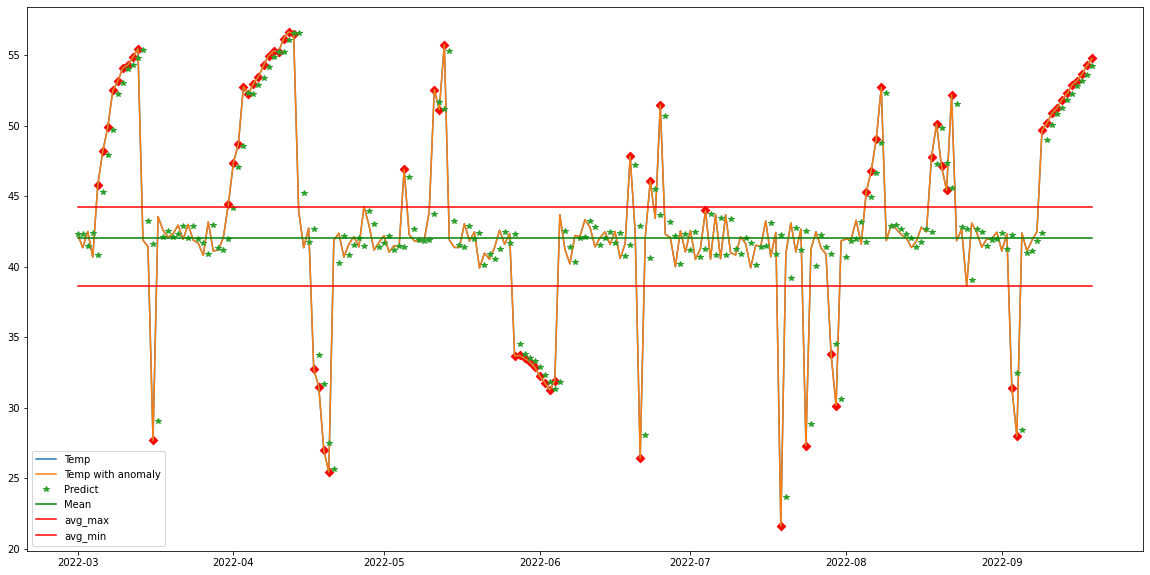

In [211]:
plot_graphs(df_final1, anomaly1,'Temp')

In [212]:
forecast_val1 = final_model1.forecast(10)

In [213]:
forecast_val1

203   54.71
204   54.71
205   54.71
206   54.71
207   54.71
208   54.71
209   54.71
210   54.71
211   54.71
212   54.71
dtype: float64

In [214]:
df_final1.tail(20)

,date,Temp,Property_num,room_id,new_Temp,anomaly,Pred_Temp
183,2022-08-31,42.45,B2,FL1_RM2,42.45,0,41.99
184,2022-09-01,41.12,B2,FL1_RM2,41.12,0,42.40
185,2022-09-02,42.35,B2,FL1_RM2,42.35,0,41.25
186,2022-09-03,41.83,B2,FL1_RM2,31.38,1,42.24
187,2022-09-04,43.08,B2,FL1_RM2,28.00,1,32.46
188,2022-09-05,42.39,B2,FL1_RM2,42.39,0,28.45
189,2022-09-06,41.11,B2,FL1_RM2,41.11,0,41.00
190,2022-09-07,41.88,B2,FL1_RM2,41.88,0,41.10
191,2022-09-08,42.48,B2,FL1_RM2,42.48,0,41.80
192,2022-09-09,42.46,B2,FL1_RM2,49.68,1,42.41


In [215]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

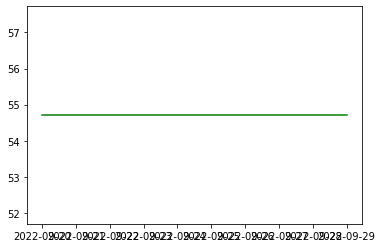

In [216]:
plt.plot(forec, forecast_val1, color='g')

In [217]:
def plot_graphs2(df, anomaly,component, forecast_val):
    new_var = 'new_' + component
    pred = 'Pred_' + component

    plt.figure(figsize=(20,10))
    plt.plot(df['date'],df[new_var], label=component)
    plt.plot(df['date'],df[new_var], label = component + ' '+'with anomaly')
    plt.plot(df['date'],df[pred], '*', label='Predict') 
    plt.plot(forec, forecast_val, color='g')
    
    
    min_ , max_ , mean_ = min(df[component]),max(df[component]),np.mean(df[component])


    plt.plot(df['date'],([mean_]*len(df)), '-', color = 'green', label='Mean') 
    plt.plot(df['date'],([max_]*len(df)), '-', color = 'red', label='avg_max') 
    plt.plot(df['date'],([min_]*len(df)), '-', color = 'red', label='avg_min') 


    #     Anomalies
    plt.scatter(anomaly['date'], anomaly[new_var], color='r', marker='D')
    plt.legend()
    plt.show()

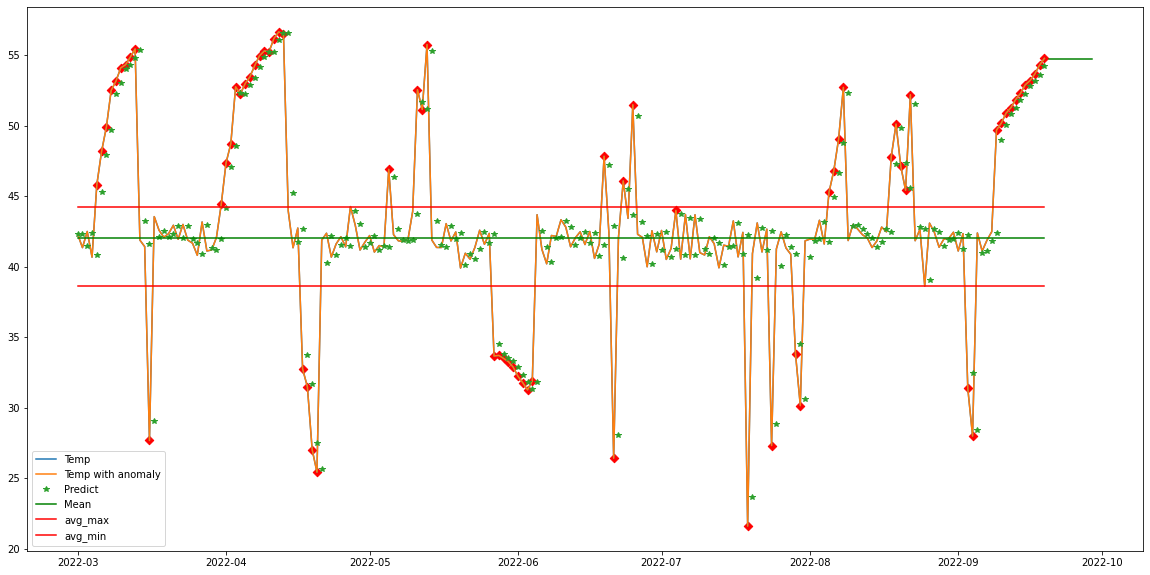

In [218]:
plot_graphs2(df_final1,anomaly1, component1,forecast_val1)

In [219]:
# df_final1['Property num'] = ['B2']*len(df_final1)
# df_final1['room_id'] = ['FL1_RM2']*len(df_final1)

In [220]:
df_final1.drop(['Temp','anomaly'],inplace=True,axis=1)

In [221]:
df_final1.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [222]:
df_final1.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B2,FL1_RM2,42.29,42.29
1,2022-03-02,B2,FL1_RM2,41.36,42.29
2,2022-03-03,B2,FL1_RM2,42.50,41.45
3,2022-03-04,B2,FL1_RM2,40.68,42.40
4,2022-03-05,B2,FL1_RM2,45.81,40.85


### For room B3 FL4_RM3

In [223]:
df_final2, final_model2, anomaly2, component2 = get_data(Exp_data, 'B3', 'FL4_RM3', 'Temp')

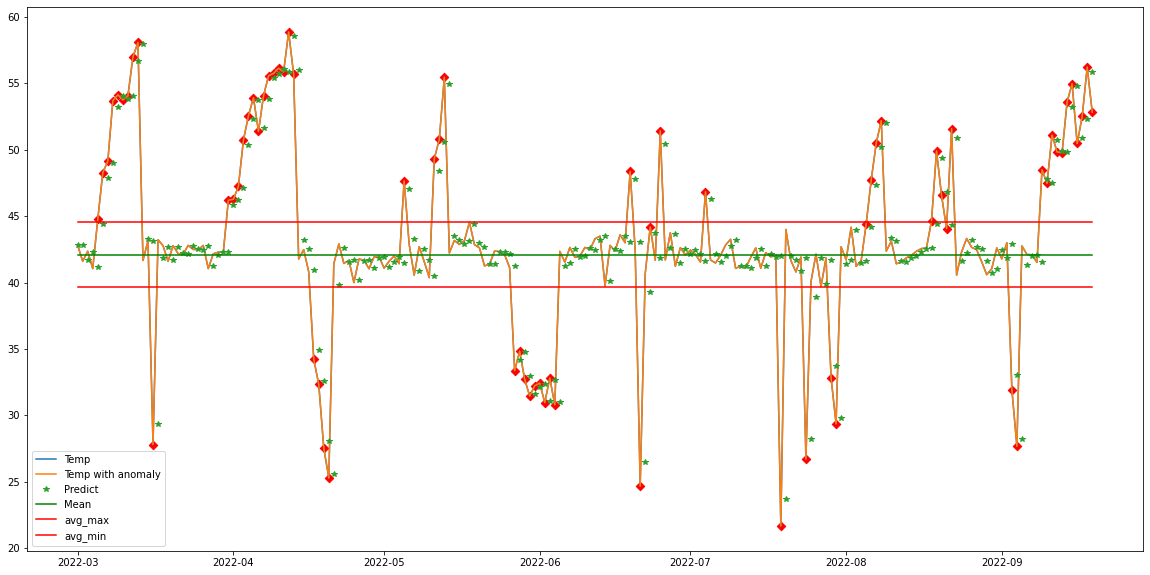

In [224]:
plot_graphs(df_final2, anomaly2,'Temp')

In [225]:
forecast_val2 = final_model2.forecast(10)

In [226]:
forecast_val2

203   53.13
204   53.13
205   53.13
206   53.13
207   53.13
208   53.13
209   53.13
210   53.13
211   53.13
212   53.13
dtype: float64

In [227]:
df_final2.head()

,date,Temp,Property_num,room_id,new_Temp,anomaly,Pred_Temp
0,2022-03-01,42.81,B3,FL4_RM3,42.81,0,42.81
1,2022-03-02,41.60,B3,FL4_RM3,41.60,0,42.81
2,2022-03-03,42.36,B3,FL4_RM3,42.36,0,41.72
3,2022-03-04,41.05,B3,FL4_RM3,41.05,0,42.30
4,2022-03-05,40.70,B3,FL4_RM3,44.77,1,41.17


In [228]:
# df_final2['Property num'] = ['B3']*len(df_final2)
# df_final2['room_id'] = ['FL4_RM3']*len(df_final2)

In [229]:
df_final2.drop(['Temp','anomaly'],inplace=True,axis=1)

In [230]:
df_final2.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [231]:
df_final2.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B3,FL4_RM3,42.81,42.81
1,2022-03-02,B3,FL4_RM3,41.60,42.81
2,2022-03-03,B3,FL4_RM3,42.36,41.72
3,2022-03-04,B3,FL4_RM3,41.05,42.30
4,2022-03-05,B3,FL4_RM3,44.77,41.17


### For room B1 FL3_RM2

In [232]:
df_final3, final_model3, anomaly3, component3 = get_data(Exp_data, 'B1', 'FL3_RM2', 'Temp')

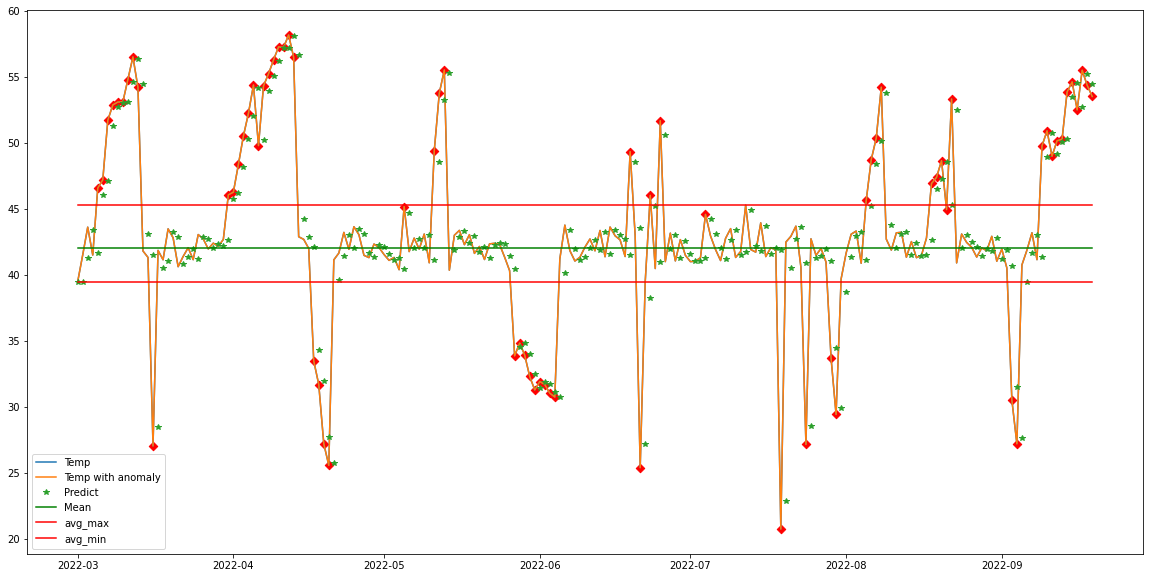

In [233]:
plot_graphs(df_final3, anomaly3,'Temp')

In [234]:
forecast_val3 = final_model3.forecast(10)

In [235]:
forecast_val3

203   53.60
204   53.60
205   53.60
206   53.60
207   53.60
208   53.60
209   53.60
210   53.60
211   53.60
212   53.60
dtype: float64

In [236]:
# df_final3['Property num'] = ['B1']*len(df_final3)
# df_final3['room_id'] = ['FL3_RM2']*len(df_final3)

In [237]:
df_final3.drop(['Temp','anomaly'],inplace=True,axis=1)

In [238]:
df_final3.rename(columns={'new_Temp':'Temp','Pred_Temp':'Prediction'},inplace=True)

In [239]:
df_final3.head()

,date,Property_num,room_id,Temp,Prediction
0,2022-03-01,B1,FL3_RM2,39.48,39.48
1,2022-03-02,B1,FL3_RM2,41.50,39.48
2,2022-03-03,B1,FL3_RM2,43.61,41.30
3,2022-03-04,B1,FL3_RM2,41.50,43.38
4,2022-03-05,B1,FL3_RM2,46.57,41.69


In [240]:
df_final = pd.concat([df_final1, df_final2, df_final3])

In [241]:
df_final.tail()

,date,Property_num,room_id,Temp,Prediction
198,2022-09-15,B1,FL3_RM2,54.61,53.49
199,2022-09-16,B1,FL3_RM2,52.49,54.50
200,2022-09-17,B1,FL3_RM2,55.49,52.69
201,2022-09-18,B1,FL3_RM2,54.35,55.21
202,2022-09-19,B1,FL3_RM2,53.50,54.44


In [242]:
df_final.drop('Prediction',axis=1,inplace=True)

In [243]:
# df_final.rename(columns={'Temp':'new_Temp'},inplace=True)

In [244]:
# df_final.to_csv('Temp_Report_for_3rooms_with_anomalies',index=False)

In [245]:
Exp_data.head()

,ID,Property num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3


In [246]:
exp_copy = Exp_data.copy()
df_copy = df_final.copy()

In [247]:
exp_copy.rename(columns={'Property num':'Property_num'},inplace=True)
df_copy.rename(columns={'Temp':'new_Temp'},inplace=True)

In [248]:
s1 = pd.merge(exp_copy,df_copy,how='left',on=['date','Property_num','room_id'])

In [249]:
s1.head()

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_Temp
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,NaN
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,NaN
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3,NaN
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3,NaN
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3,NaN


In [250]:
s1.new_Temp = np.where(s1.new_Temp.isnull(),s1.Temp, s1.new_Temp)

In [251]:
s1.head()

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_Temp
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,46.00
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,42.00
2,3,B4,47,2022-03-01 00:02:00,out,38.53,3,388.49,FL1_RM4,1,2022-03-01,00:02:00,1,3,47.00
3,4,B4,41,2022-03-01 00:03:00,out,1.02,4,386.79,FL3_RM3,3,2022-03-01,00:03:00,1,3,41.00
4,5,B2,37,2022-03-01 00:04:00,out,68.47,4,410.94,FL4_RM2,4,2022-03-01,00:04:00,1,3,37.00


In [252]:
s1.drop(['Temp','Humidity','Dust','CO2 level','date','time','day','month'],axis=1,inplace=True)

In [253]:
s1.rename(columns={'new_temp':'Temp'},inplace=True)

In [254]:
s1.head()

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,47.00
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,41.00
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,37.00


In [255]:
# s2 = s1[s1['Temp'] !=s1['new_Temp']]

In [256]:
# len(s2)

In [257]:
# s1.to_csv('Temp_Report_with_anomalies',index=False)

## CO2

### For B1 FL3_RM2

In [258]:
df_final4, final_model4, anomaly4, component4 = get_data(Exp_data, 'B1', 'FL3_RM2', 'CO2 level')

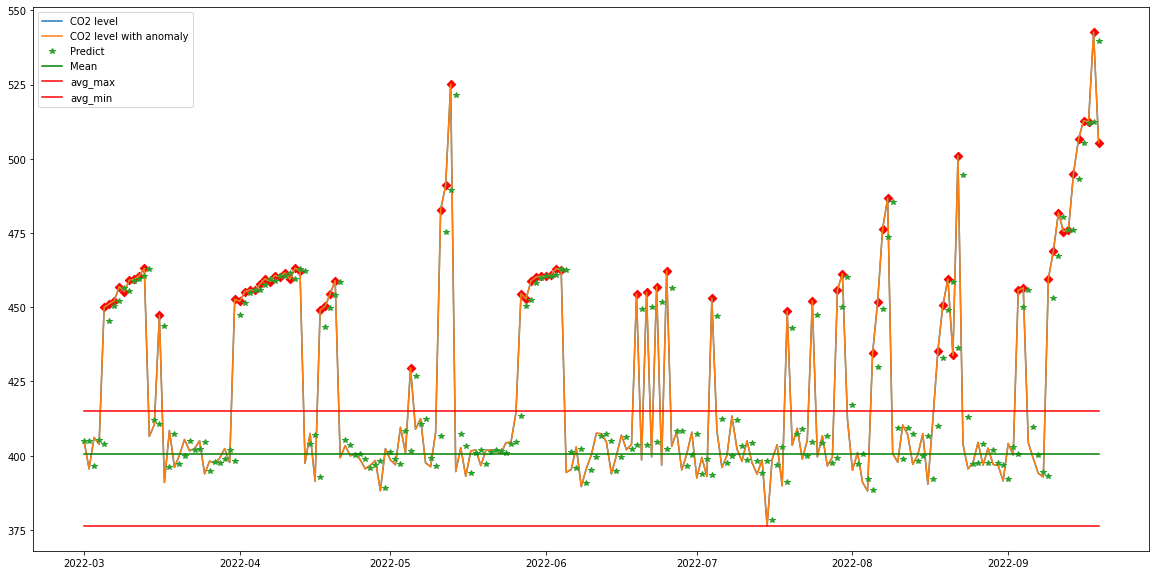

In [259]:
plot_graphs(df_final4, anomaly4,'CO2 level')

In [260]:
df_final4.tail(11)

,date,CO2 level,Property_num,room_id,new_CO2 level,anomaly,Pred_CO2 level
192,2022-09-09,392.88,B1,FL3_RM2,459.66,1,393.01
193,2022-09-10,397.39,B1,FL3_RM2,468.92,1,453.00
194,2022-09-11,404.90,B1,FL3_RM2,481.83,1,467.33
195,2022-09-12,399.57,B1,FL3_RM2,475.49,1,480.38
196,2022-09-13,390.17,B1,FL3_RM2,476.01,1,475.98
197,2022-09-14,399.21,B1,FL3_RM2,495.02,1,476.00
198,2022-09-15,392.67,B1,FL3_RM2,506.54,1,493.12
199,2022-09-16,413.59,B1,FL3_RM2,512.86,1,505.20
200,2022-09-17,403.46,B1,FL3_RM2,512.40,1,512.09
201,2022-09-18,408.07,B1,FL3_RM2,542.73,1,512.37


In [261]:
forecast_val4 = final_model4.forecast(10)

In [262]:
forecast_val4

203   508.88
204   508.88
205   508.88
206   508.88
207   508.88
208   508.88
209   508.88
210   508.88
211   508.88
212   508.88
dtype: float64

In [263]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

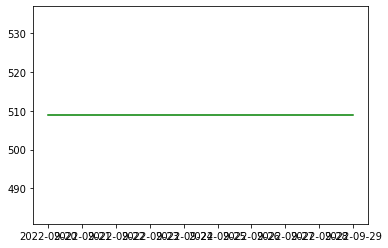

In [264]:
plt.plot(forec, forecast_val4, color='g')

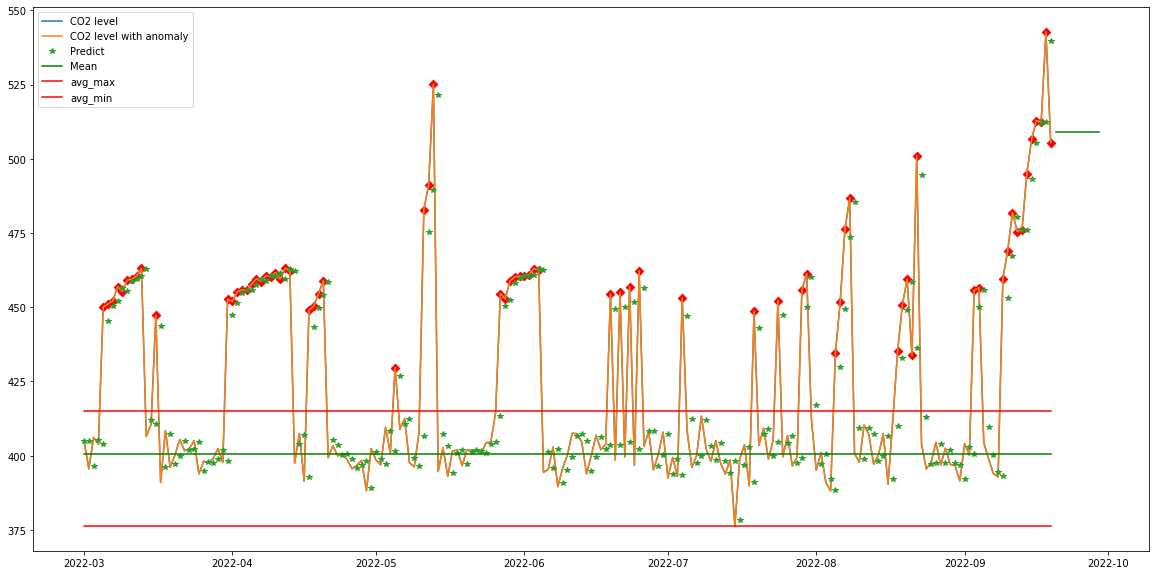

In [265]:
plot_graphs2(df_final4,anomaly4, component4,forecast_val4)

### For room B4 FL1_RM2

In [266]:
df_final5, final_model5, anomaly5, component5 = get_data(Exp_data, 'B4', 'FL1_RM2', 'CO2 level')

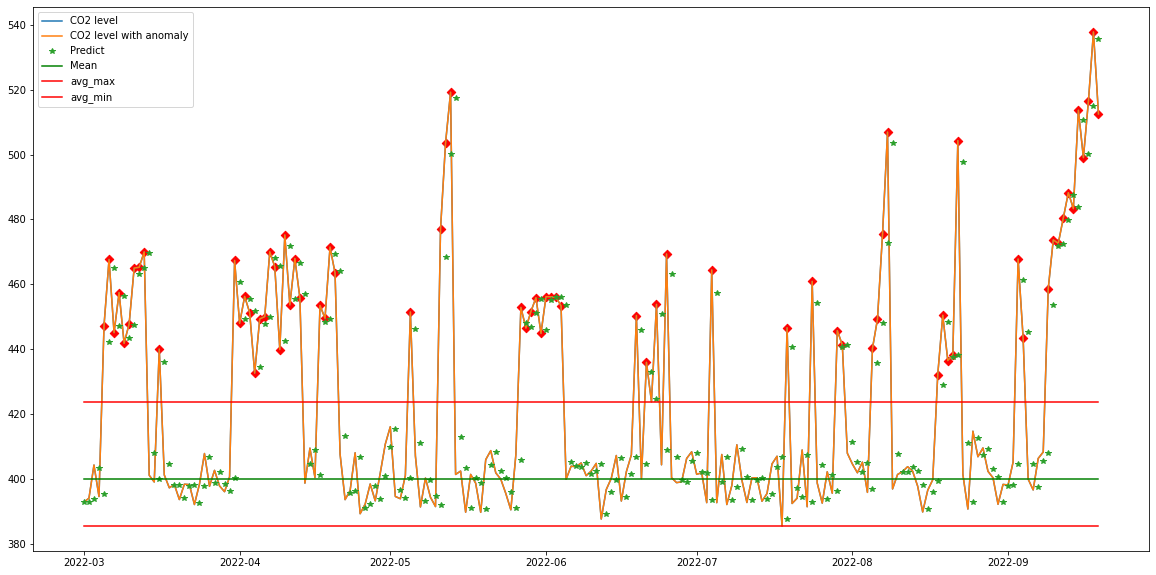

In [267]:
plot_graphs(df_final5, anomaly5,'CO2 level')

In [268]:
forecast_val5 = final_model5.forecast(10)

In [269]:
forecast_val5

203   514.81
204   514.81
205   514.81
206   514.81
207   514.81
208   514.81
209   514.81
210   514.81
211   514.81
212   514.81
dtype: float64

In [270]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

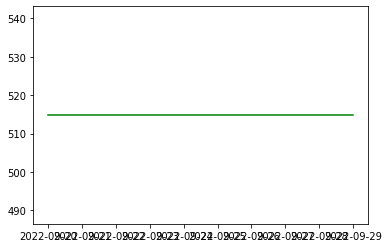

In [271]:
plt.plot(forec, forecast_val5, color='g')

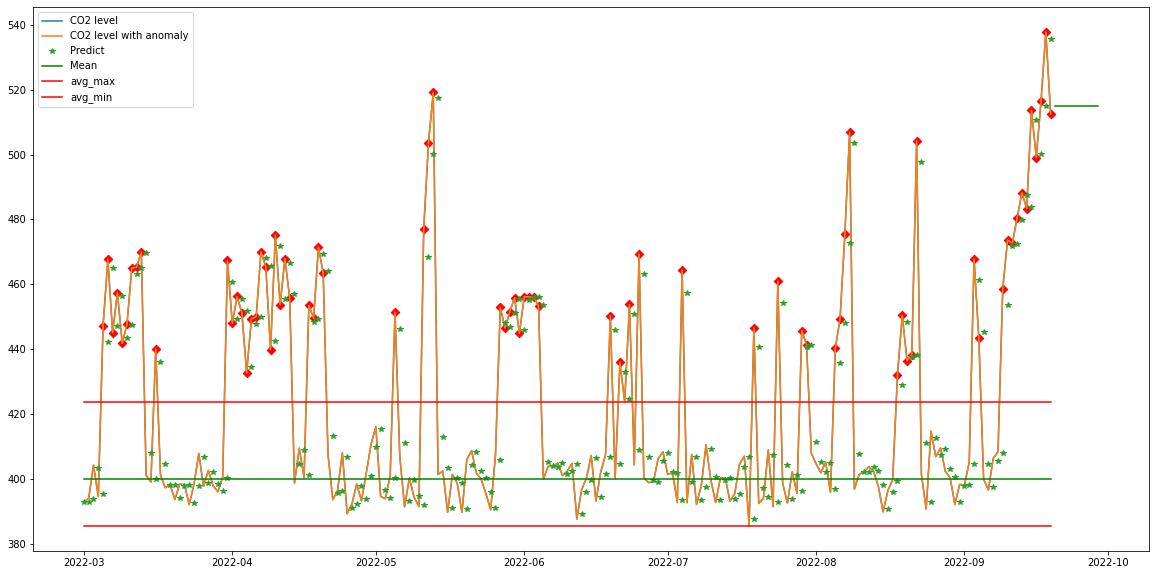

In [272]:
plot_graphs2(df_final5,anomaly5, component5,forecast_val5)

### For room B3 FL2_RM1

In [273]:
df_final6, final_model6, anomaly6, component6 = get_data(Exp_data, 'B3', 'FL2_RM1', 'CO2 level')

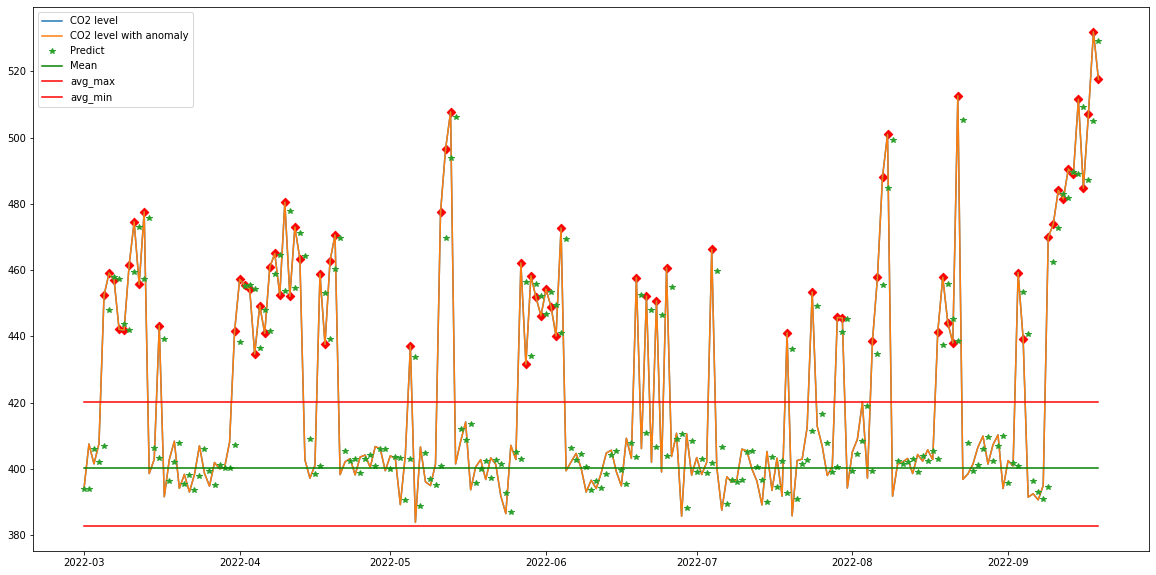

In [274]:
plot_graphs(df_final6, anomaly6,'CO2 level')

In [275]:
forecast_val6 = final_model6.forecast(10)

In [276]:
forecast_val6

203   518.74
204   518.74
205   518.74
206   518.74
207   518.74
208   518.74
209   518.74
210   518.74
211   518.74
212   518.74
dtype: float64

In [277]:
forec = pd.to_datetime(['2022-09-20','2022-09-21','2022-09-22','2022-09-23','2022-09-24','2022-09-25','2022-09-26','2022-09-27','2022-09-28','2022-09-29'])

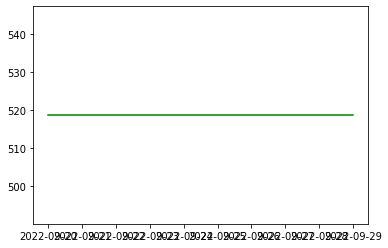

In [278]:
plt.plot(forec, forecast_val6, color='g')

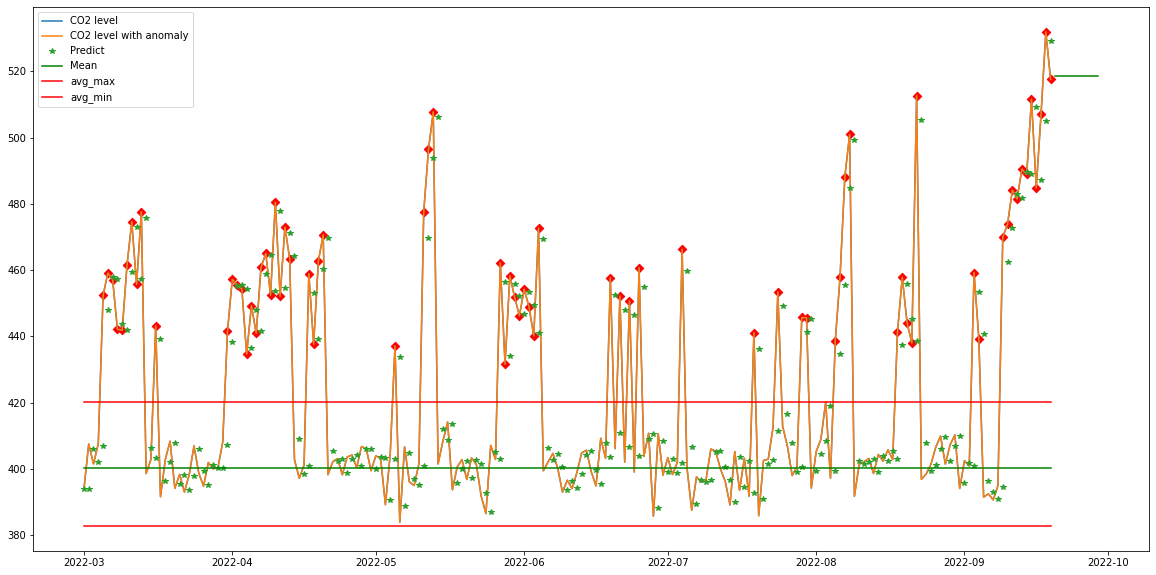

In [279]:
plot_graphs2(df_final6,anomaly6, component6,forecast_val6)

In [280]:
df_final2 = pd.concat([df_final4, df_final5, df_final6])

In [281]:
df_final2.head(2)

,date,CO2 level,Property_num,room_id,new_CO2 level,anomaly,Pred_CO2 level
0,2022-03-01,404.91,B1,FL3_RM2,404.91,0,404.91
1,2022-03-02,395.57,B1,FL3_RM2,395.57,0,404.91


In [282]:
df_final2.drop('Pred_CO2 level',axis=1,inplace=True)

In [283]:
df_final2.drop(['CO2 level','anomaly'],axis=1,inplace=True)

In [284]:
exp_copy2 = Exp_data.copy()
df_copy2 = df_final2.copy()

In [285]:
exp_copy2.rename(columns={'Property num':'Property_num'},inplace=True)


In [286]:
s2 = pd.merge(exp_copy2,df_copy2,how='left',on=['date','Property_num','room_id'])

In [287]:
s2.head(2)

,ID,Property_num,Temp,noted Date,Status,Humidity,Dust,CO2 level,room_id,Floor_Number,date,time,day,month,new_CO2 level
0,1,B3,46,2022-03-01 00:00:00,in,-8.54,4,445.68,FL3_RM3,3,2022-03-01,00:00:00,1,3,NaN
1,2,B4,42,2022-03-01 00:01:00,out,34.16,3,412.39,FL4_RM4,4,2022-03-01,00:01:00,1,3,NaN


In [288]:
s2['new_CO2 level'] = np.where(s2['new_CO2 level'].isnull(),s2['CO2 level'], s2['new_CO2 level'])

In [289]:
s2.drop(['Temp','Humidity','Dust','CO2 level','date','time','day','month'],axis=1,inplace=True)

In [290]:
s2.rename(columns={'new_CO2 level':'CO2_level'},inplace=True)

In [291]:
s2.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,CO2_level
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39


In [292]:
# s2.to_csv('CO2_Report_with_anomalies',index=False)

In [293]:
len(s1)

292321

In [294]:
len(s2)

292321

### Rooms which need maintenance

In [295]:
s2.head()

,ID,Property_num,noted Date,Status,room_id,Floor_Number,CO2_level
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39
2,3,B4,2022-03-01 00:02:00,out,FL1_RM4,1,388.49
3,4,B4,2022-03-01 00:03:00,out,FL3_RM3,3,386.79
4,5,B2,2022-03-01 00:04:00,out,FL4_RM2,4,410.94


In [296]:
s1.head(1)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp
0,1,B3,2022-03-01,in,FL3_RM3,3,46.00


In [297]:
Property = ['B1','B2','B3','B4']
Floor = ['FL1_','FL2_','FL3_','FL4_']
Room = ['RM1','RM2','RM3','RM4']

In [298]:
m = s1.copy()

In [299]:
np.unique(m['Property_num'])

array(['B1', 'B2', 'B3', 'B4'], dtype=object)

In [300]:
for b in np.unique(m['Property_num']):
    print(b)

B1
B2
B3
B4


In [301]:
for b in np.unique(m['room_id']):
    print(b)

FL1_RM1
FL1_RM2
FL1_RM3
FL1_RM4
FL2_RM1
FL2_RM2
FL2_RM3
FL2_RM4
FL3_RM1
FL3_RM2
FL3_RM3
FL3_RM4
FL4_RM1
FL4_RM2
FL4_RM3
FL4_RM4


In [302]:
def get_date(df):
    df['noted Date'] = pd.to_datetime(df['noted Date'])
    df['date'] = df['noted Date'].dt.date
    
    return df

In [303]:
m=get_date(m)
avgr = component_avg(m,'new_Temp')

In [304]:
avgr.tail()

,date,new_Temp
199,2022-09-16,42.46
200,2022-09-17,42.51
201,2022-09-18,42.78
202,2022-09-19,42.77
203,2022-09-20,47.00


In [305]:
list(avgr['new_Temp'])[-3]

42.777652777777774

In [306]:
def get_forecast(df, component):
    
    model = SimpleExpSmoothing(df[component])
    fit_model = model.fit(smoothing_level=0.9, optimized=False)
    forecast_val = fit_model.forecast(2)
    
    return list(forecast_val)

In [307]:
m.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp,date
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00,2022-03-01
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00,2022-03-01


In [308]:
val = get_forecast(m,'new_Temp')

In [309]:
val[1]

47.099434675657605

In [315]:
def get_anomaly(df,component):
    if component == 'new_Temp':
        df['anomaly'] = np.where((df[component]<35) | (df[component]>=50),1,0)
    else:
        df['anomaly'] = np.where((df[component]>450) ,1,0)
        
    return df
        

In [316]:
anom3 = get_anomaly(m,'new_Temp')

In [317]:
anom3.tail(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp,date,anomaly
292319,292320,B1,2022-09-19 23:59:00,in,FL4_RM4,4,48.00,2022-09-19,0
292320,292321,B3,2022-09-20 00:00:00,in,FL2_RM4,2,47.00,2022-09-20,0


In [318]:
def convert_forecast(val, component):
    forecasts = []
    if component=='new_Temp':
        for value in val:
            if (value<35)| (value>=50):
                forecasts.append(1)
            else:
                forecasts.append(0)
    else:            
        for value in val:
            if  value>450:
                forecasts.append(1)
            else:
                forecasts.append(0)              
                
    return forecasts

In [319]:
x=[451,53]
y=convert_forecast(x,'neemp')

In [320]:
y

[1, 0]

In [321]:
def get_maintenance_report(df, component):
    
    Property_num = []
    room_id = []
    strt_dt = []
    present = []
    past2 = []
    past1 = []
    forc1 = []
    forc2 = []
    for prop in np.unique(df['Property_num']):
        for rm in np.unique(df['room_id']):
            df1 = df[(df['Property_num']==prop) & (df['room_id']==rm)]
            df1 = get_date(df1)
            df1_avg = component_avg(df1, component)
            df1_anomaly = get_anomaly(df1_avg, component)
            forecast_val = get_forecast(df1_avg, component)
            for1, for2 = forecast_val[0], forecast_val[1]
            f =  convert_forecast(forecast_val, component)
            prest = list(df1_anomaly[component])[-1]
            pas1 = list(df1_anomaly[component])[-2]
            pas2 = list(df1_anomaly[component])[-3]
            str_dt = list(df1_anomaly['date'])[-3]
            
            p0 = list(df1_anomaly['anomaly'])[-1]
            p1 = list(df1_anomaly['anomaly'])[-2]
            p2 = list(df1_anomaly['anomaly'])[-3]
            f1 = f[0]
            f2=  f[1]
            if (p2==1) & (p1==1)& (p0==1)& (f1==1)& (f2==1):
                Property_num.append(prop)
                room_id.append(rm)
                strt_dt.append(str_dt)
                present.append(prest)
                past2.append(pas2)
                past1.append(pas1)
                forc1.append(for1)
                forc2.append(for2)
                
                
                
                
              
            else:
                continue
       
    report = pd.DataFrame({'Property_num':Property_num,'room_id':room_id,'Starting_date_of_anomaly':strt_dt,'Starting_past_anomaly':past2,'Second_anomaly':past1,'Present_anomaly':present,'Forecast_anomaly1':forc1,'Forecast_anomaly2':forc2})
    report['Service']=['Maintenance Needed']*len(report)
    
    
    return report
                
            
            
            

            
            

In [322]:
s1.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,new_Temp
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,46.00
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,42.00


In [323]:
r = s1.copy()

In [324]:
temp_maintenance_report = get_maintenance_report(r, 'new_Temp')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [325]:
temp_maintenance_report

,Property_num,room_id,Starting_date_of_anomaly,Starting_past_anomaly,Second_anomaly,Present_anomaly,Forecast_anomaly1,Forecast_anomaly2,Service
0,B1,FL3_RM2,2022-09-17,55.49,54.35,53.50,53.60,53.60,Maintenance Needed
1,B2,FL1_RM2,2022-09-17,53.66,54.29,54.77,54.71,54.71,Maintenance Needed
2,B3,FL4_RM3,2022-09-17,52.51,56.23,52.83,53.13,53.13,Maintenance Needed


In [326]:
s2.head(2)

,ID,Property_num,noted Date,Status,room_id,Floor_Number,CO2_level
0,1,B3,2022-03-01 00:00:00,in,FL3_RM3,3,445.68
1,2,B4,2022-03-01 00:01:00,out,FL4_RM4,4,412.39


In [328]:
s = s2.copy()

In [329]:
co2_maintenance_report = get_maintenance_report(s, 'CO2_level')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [330]:
co2_maintenance_report

,Property_num,room_id,Starting_date_of_anomaly,Starting_past_anomaly,Second_anomaly,Present_anomaly,Forecast_anomaly1,Forecast_anomaly2,Service
0,B1,FL3_RM2,2022-09-17,512.40,542.73,505.46,508.88,508.88,Maintenance Needed
1,B3,FL2_RM1,2022-09-17,507.10,531.93,517.57,518.74,518.74,Maintenance Needed
2,B4,FL1_RM2,2022-09-17,516.44,537.78,512.52,514.81,514.81,Maintenance Needed


In [331]:
temp_maintenance_report

,Property_num,room_id,Starting_date_of_anomaly,Starting_past_anomaly,Second_anomaly,Present_anomaly,Forecast_anomaly1,Forecast_anomaly2,Service
0,B1,FL3_RM2,2022-09-17,55.49,54.35,53.50,53.60,53.60,Maintenance Needed
1,B2,FL1_RM2,2022-09-17,53.66,54.29,54.77,54.71,54.71,Maintenance Needed
2,B3,FL4_RM3,2022-09-17,52.51,56.23,52.83,53.13,53.13,Maintenance Needed


In [332]:
co2_maintenance_report.to_csv('co2_maintenance_report',index=False)

In [333]:
temp_maintenance_report.to_csv('Temperature_maintenance_report',index=False)

In [74]:
df_final, final_model, anomaly, component = get_data(Exp_data, 'B2', 'FL1_RM2', 'CO2 level')

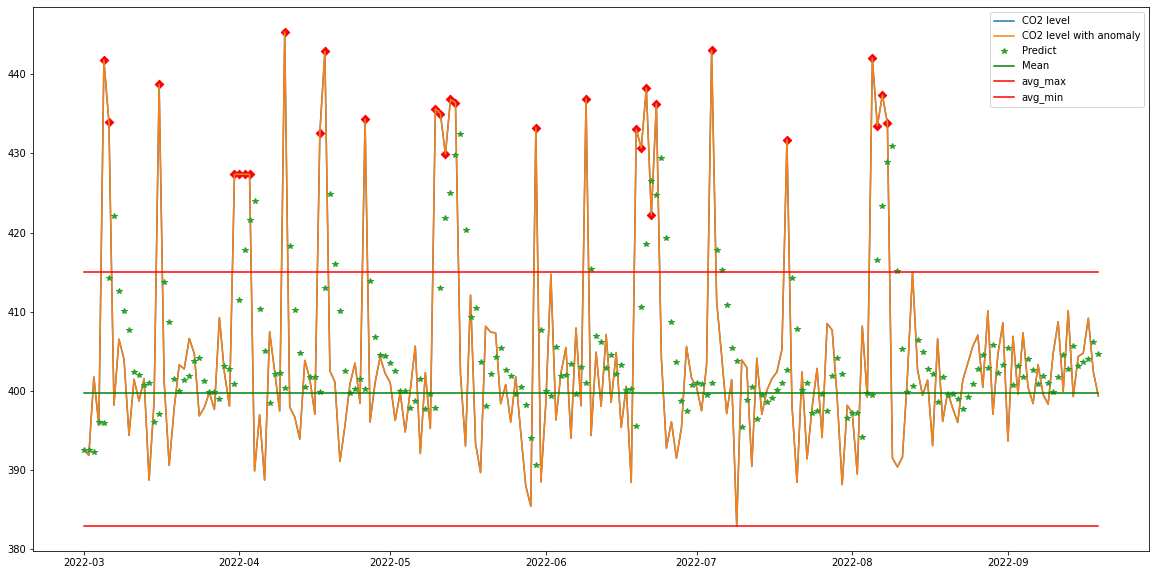

In [75]:
plot_graphs(df_final, anomaly,'CO2 level')

In [76]:
forecast_val = final_model.forecast(10)

In [77]:
forecast_val

203   402.55
204   402.55
205   402.55
206   402.55
207   402.55
208   402.55
209   402.55
210   402.55
211   402.55
212   402.55
dtype: float64

In [65]:
# exp_avg = component_avg(Exp_data, component)
# final_result = pd.merge(df_final, exp_avg, on='date')

In [66]:
# final_result.head()

,date,Temp_x,new_Temp,anomaly,Pred_Temp,Temp_y
0,2022-03-01,41.86,41.86,0,41.86,41.93
1,2022-03-02,42.89,42.89,0,41.86,41.82
2,2022-03-03,40.68,40.68,0,42.28,42.10
3,2022-03-04,42.57,42.57,0,41.64,42.11
4,2022-03-05,41.90,56.57,1,42.01,42.17


In [54]:
Exp_data.head()

,Unnamed: 0,ID,Property num,room_id,Temp,noted Date,Status,Humidity,Dust,CO2 level,Floor_Number,date,time,day,month
0,0,846757,B2,FL3_RM4,36,2022-03-01 00:00:00,in,58.79,4,397.35,3,2022-03-01,00:00:00,1,3
1,1,176700,B4,FL4_RM4,49,2022-03-01 00:01:00,in,10.00,2,387.94,4,2022-03-01,00:01:00,1,3
2,2,794684,B2,FL4_RM1,46,2022-03-01 00:02:00,out,-27.73,4,369.31,4,2022-03-01,00:02:00,1,3
3,3,82279,B2,FL1_RM2,35,2022-03-01 00:03:00,in,-13.89,2,386.88,1,2022-03-01,00:03:00,1,3
4,4,213641,B4,FL3_RM3,41,2022-03-01 00:04:00,out,3.92,3,414.59,3,2022-03-01,00:04:00,1,3


In [28]:
Exp_data['new_temp'] = Exp_data['Temp']*(-1.2)

In [29]:
Data_recorded = pd.DataFrame(Exp_data.groupby(['Property num','room_id','new_temp']).agg({'new_temp':'count'}))
Data_recorded.head(15)

new_temp
Property num room_id new_temp          
B1           FL1_RM1 -58.80         250
                     -57.60         257
                     -56.40         227
                     -55.20         249
                     -54.00         231
                     -52.80         218
                     -51.60         238
                     -50.40         235
                     -49.20         248
                     -48.00         250
                     -46.80         216
                     -45.60         236
                     -44.40         236
                     -43.20         217
                     -42.00         203

In [17]:
temp_data = Exp_data[['Property num','room_id','Status','date','Temp']]
temp_data.head()

,Property num,room_id,Status,date,Temp
0,B2,FL3_RM4,in,2022-03-01,36
1,B4,FL4_RM4,in,2022-03-01,49
2,B2,FL4_RM1,out,2022-03-01,46
3,B2,FL1_RM2,in,2022-03-01,35
4,B4,FL3_RM3,out,2022-03-01,41


In [19]:
temp_data['date']=temp_data['date'].apply(pd.to_datetime)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def plot_graph_for_room(df,dt1,dt2, prop_num, flr_rm):
    df=df[(df['date']>= dt1) & (df['date']<= dt2)]
    df=df[(df['Property num']==prop_num) & (df['room_id']==flr_rm)]
    
    
    
    

In [22]:
df=temp_data[(temp_data['Property num']=='B2') & (temp_data['room_id']=='FL3_RM4')]
df.head()

,Property num,room_id,Status,date,Temp
0,B2,FL3_RM4,in,2022-03-01,36
64,B2,FL3_RM4,out,2022-03-01,38
106,B2,FL3_RM4,in,2022-03-01,42
416,B2,FL3_RM4,out,2022-03-01,35
512,B2,FL3_RM4,out,2022-03-01,41


In [ ]:
temp_data.dtypes

In [20]:
temp_data['date'].dtype

dtype('<M8[ns]')

In [21]:
# temp_data[(temp_data['date']>= '2022-04-01') & (temp_data['date']<= '2022-04-02')]

In [32]:
# Exp_data.head()

,Unnamed: 0,ID,Property num,room_id,Temp,noted Date,Status,Humidity,Dust,CO2 level,Floor_Number,date,time,day,month
0,0,846757,B2,FL3_RM4,36,2022-03-01 00:00:00,in,58.79,4,397.35,3,2022-03-01,00:00:00,1,3
1,1,176700,B4,FL4_RM4,49,2022-03-01 00:01:00,in,10.00,2,387.94,4,2022-03-01,00:01:00,1,3
2,2,794684,B2,FL4_RM1,46,2022-03-01 00:02:00,out,-27.73,4,369.31,4,2022-03-01,00:02:00,1,3
3,3,82279,B2,FL1_RM2,35,2022-03-01 00:03:00,in,-13.89,2,386.88,1,2022-03-01,00:03:00,1,3
4,4,213641,B4,FL3_RM3,41,2022-03-01 00:04:00,out,3.92,3,414.59,3,2022-03-01,00:04:00,1,3


In [33]:
len(Exp_data[(Exp_data['Property num']=='B1') & (Exp_data['day']==1)& (Exp_data['month']==3)& (Exp_data['room_id']=='FL3_RM2')])

31

In [34]:
len(Exp_data[Exp_data['room_id']=='FL3_RM2'])

14615

In [35]:
# Exp_data1[(Exp_data1['Property num']=='B1') & (Exp_data1['day']==1)& (Exp_data1['month']==3)]

In [36]:
temp_data = Exp_data[['Property num','room_id','noted Date','Status','Floor_Number','date','time','Temp']]
temp_data.head()

,Property num,room_id,noted Date,Status,Floor_Number,date,time,Temp
0,B2,FL3_RM4,2022-03-01 00:00:00,in,3,2022-03-01,00:00:00,36
1,B4,FL4_RM4,2022-03-01 00:01:00,in,4,2022-03-01,00:01:00,49
2,B2,FL4_RM1,2022-03-01 00:02:00,out,4,2022-03-01,00:02:00,46
3,B2,FL1_RM2,2022-03-01 00:03:00,in,1,2022-03-01,00:03:00,35
4,B4,FL3_RM3,2022-03-01 00:04:00,out,3,2022-03-01,00:04:00,41


In [37]:
len(temp_data)

230401

In [38]:
# creating anomaly column
temp_data['anomaly'] = np.where((temp_data['Temp']>43) , 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
temp_data.head()

,Property num,room_id,noted Date,Status,Floor_Number,date,time,Temp,anomaly
0,B2,FL3_RM4,2022-03-01 00:00:00,in,3,2022-03-01,00:00:00,36,0
1,B4,FL4_RM4,2022-03-01 00:01:00,in,4,2022-03-01,00:01:00,49,1
2,B2,FL4_RM1,2022-03-01 00:02:00,out,4,2022-03-01,00:02:00,46,1
3,B2,FL1_RM2,2022-03-01 00:03:00,in,1,2022-03-01,00:03:00,35,0
4,B4,FL3_RM3,2022-03-01 00:04:00,out,3,2022-03-01,00:04:00,41,0


In [41]:
# anomaly_temp.index

### Plots for Block temperatues and with anomalies as well

In [42]:
def block_plot(block):
    plt.figure(figsize=(40,15))
    block_data=temp_data[temp_data['Property num']==block]
    plt.plot(block_data['date'],block_data['Temp'])

#     day_avg_temp = block_data.groupby('date')['Temp'].mean().reset_index().fillna(0).set_index('date')
    anomaly_temp = temp_data[temp_data['anomaly']==1]
    for month in range(3,9):
        plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)
    plt.scatter(anomaly_temp['date'], anomaly_temp['Temp'], color='r', marker='D')

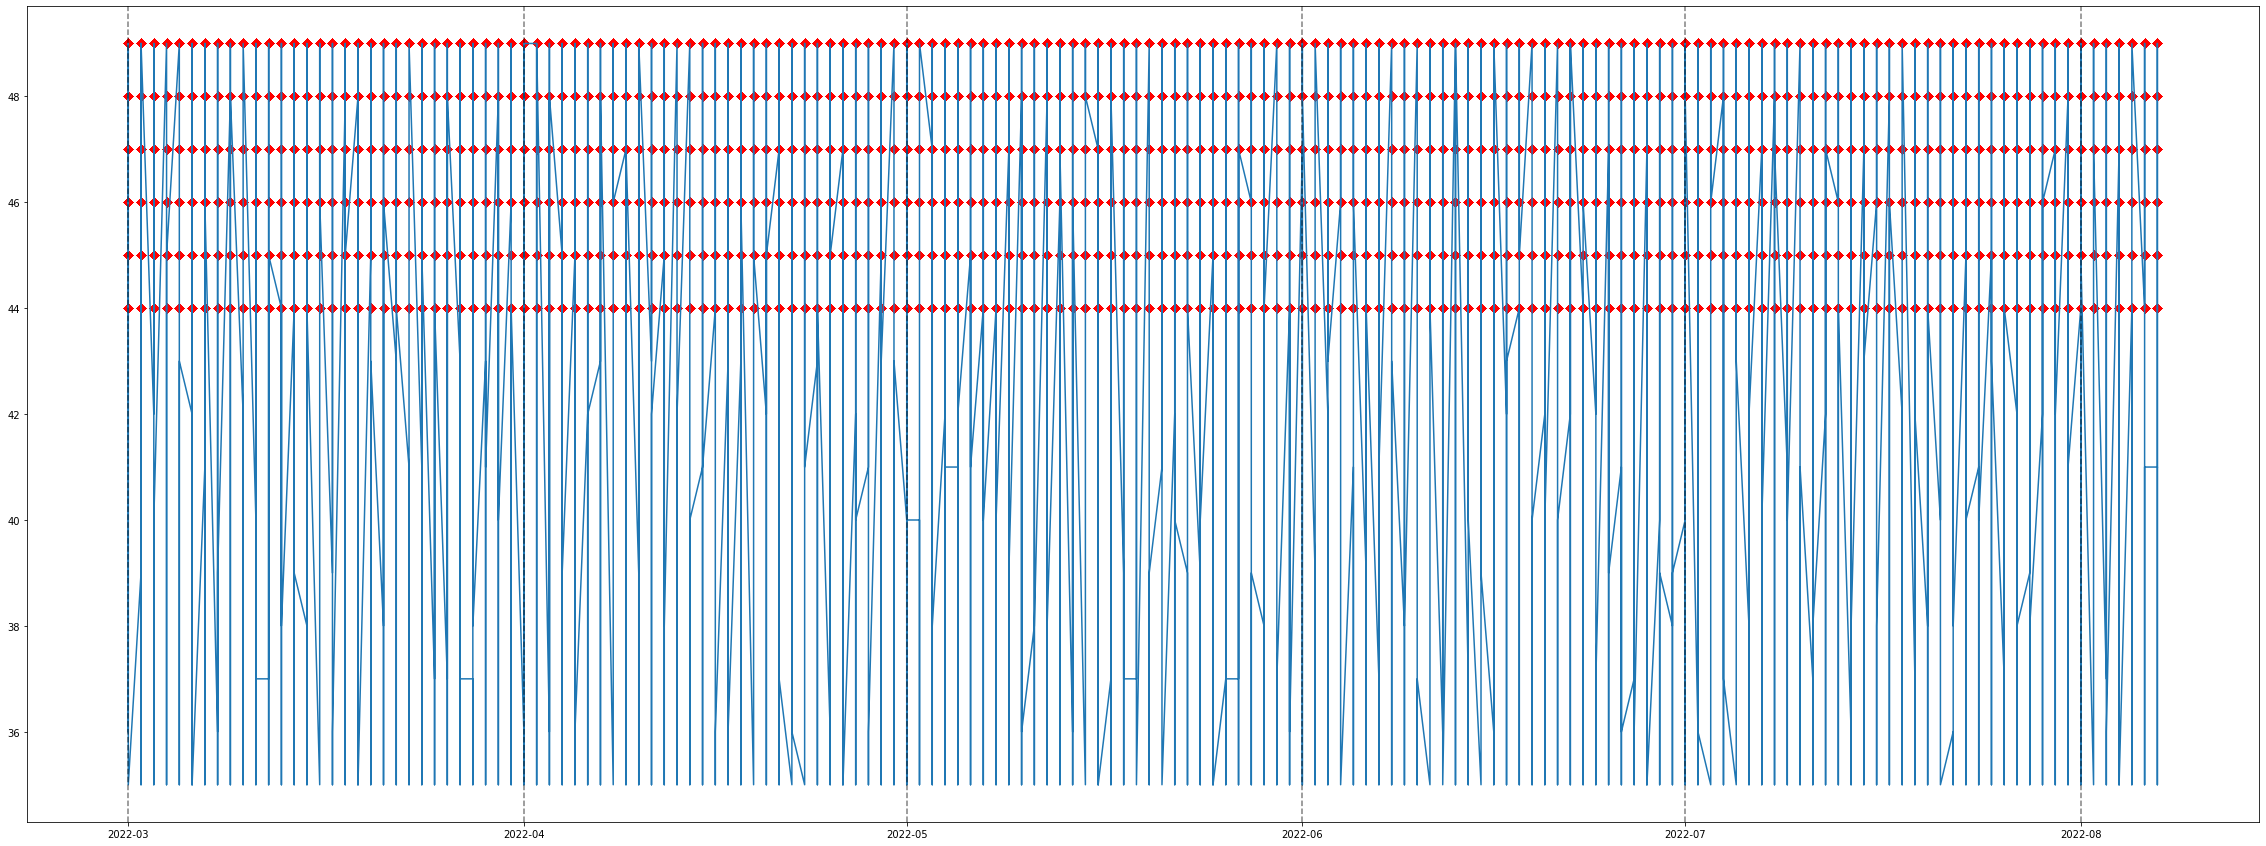

In [45]:
block_plot('B2')

### Plots for Block temperatues and with average of anomalies as well

In [46]:
def block_plot2(df,block):
    plt.figure(figsize=(20,5))
    df = df.copy()
    block_data=df[df['Property num']==block]
    plt.plot(df['date'],df['Temp'])
#     day_avg_temp = block_data.groupby('date')['Temp'].mean().reset_index().fillna(0).set_index('date')
    anomaly_temp = df[df['anomaly']==1]
    ana_mean=anomaly_temp.groupby('date').agg({'Temp':'mean'})
    for month in range(3,9):
        plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)
    plt.scatter(ana_mean.index, ana_mean['Temp'], color='r', marker='D')

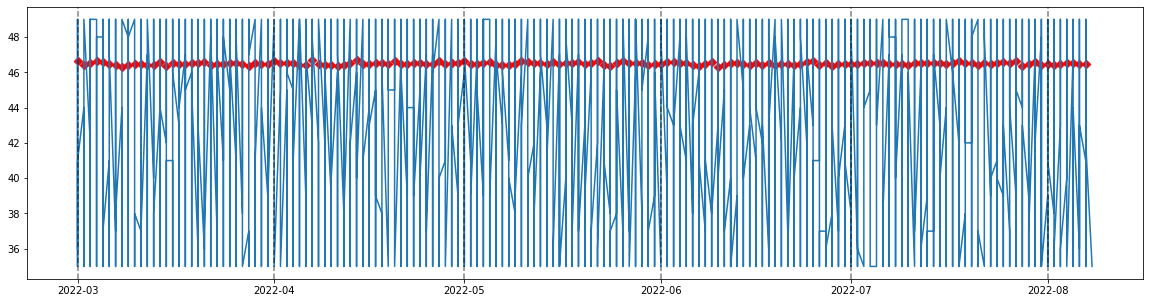

In [47]:
block_plot2(temp_data,'B2')

### Plot for block with min,max average and average of anomalies as well

In [48]:
def block_plot3(df,block):
    plt.figure(figsize=(20,5))
    df = df.copy()
    block_data=df[df['Property num']==block]
#     day_avg_temp = block_data.groupby('date')['Temp'].mean().reset_index().fillna(0).set_index('date')
    block_minmax=block_data.groupby('date').agg({'Temp':['min', 'max']})
    plt.plot((block_minmax[('Temp', 'min')]+block_minmax[('Temp', 'max')])/2)
    anomaly_temp = df[df['anomaly']==1]
    ana_mean=anomaly_temp.groupby('date').agg({'Temp':'mean'})


    for month in range(3,10):
        plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)
    plt.scatter(ana_mean.index, ana_mean['Temp'], color='r', marker='D')

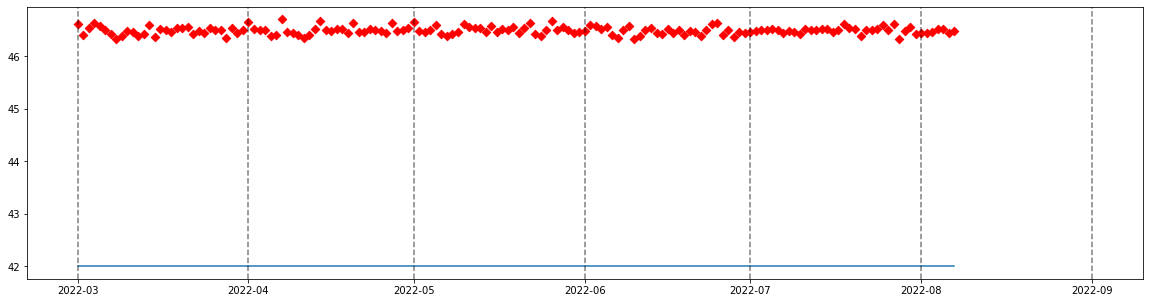

In [49]:
block_plot3(temp_data,'B2')

### Plot for block with average block temperatures and average anomalies

In [50]:
def block_plot4(df,block):
    plt.figure(figsize=(20,5))
    df = df.copy()
    block_data=df[df['Property num']==block]
    block_mean=block_data.groupby('date').agg({'Temp':'mean'})
    plt.plot(block_mean)

    anomaly_temp = df[df['anomaly']==1]
    ana_mean=anomaly_temp.groupby('date').agg({'Temp':'mean'})


    for month in range(3,10):
        plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)
    plt.scatter(ana_mean.index, ana_mean['Temp'], color='r', marker='D')

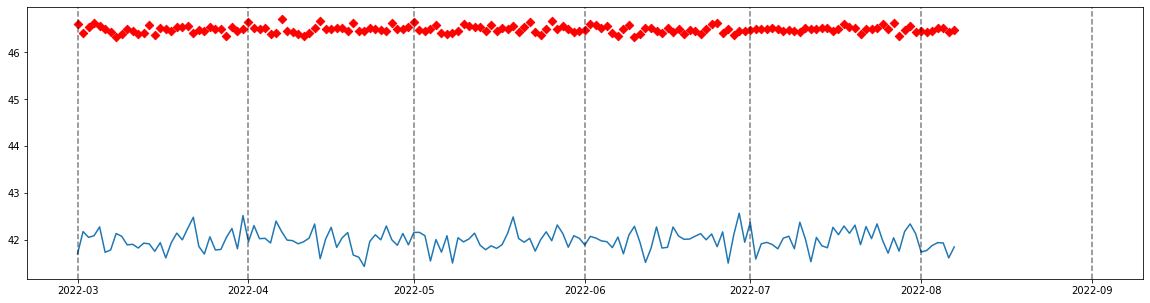

In [51]:
block_plot4(temp_data,'B2')

### Plot for block average temperature and anomalies

In [52]:
def block_plot5(df,block):
    plt.figure(figsize=(20,5))
    df = df.copy()
    block_data=df[df['Property num']==block]
    block_mean=block_data.groupby('date').agg({'Temp':'mean'})
    plt.plot(block_mean)
    
    anomaly_temp = df[df['anomaly']==1]

    for month in range(3,9):
        plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)
    plt.scatter(anomaly_temp['date'], anomaly_temp['Temp'], color='r', marker='D')

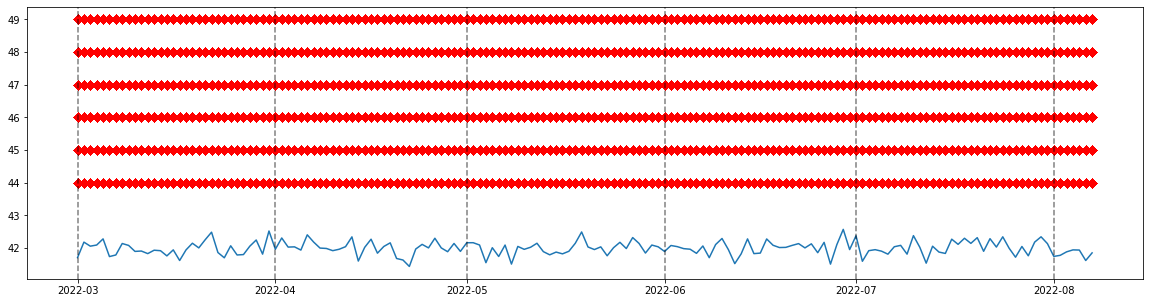

In [53]:
block_plot5(temp_data,'B2')

In [196]:
np.mean(temp_data['Temp'])

42.01065533569733

In [208]:
x=temp_data.groupby('date').agg({'Temp':'mean'})
x.columns

Index(['Temp'], dtype='object')

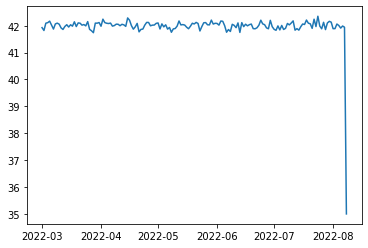

In [209]:
plt.plot(x)

In [192]:
x=temp_data.groupby('date').agg({'Temp':['min', 'max']})
# (x['min']+x['max'])/2
x

Temp    
            min max
date               
2022-03-01   35  49
2022-03-02   35  49
2022-03-03   35  49
2022-03-04   35  49
2022-03-05   35  49
...         ...  ..
2022-08-04   35  49
2022-08-05   35  49
2022-08-06   35  49
2022-08-07   35  49
2022-08-08   35  35

[161 rows x 2 columns]

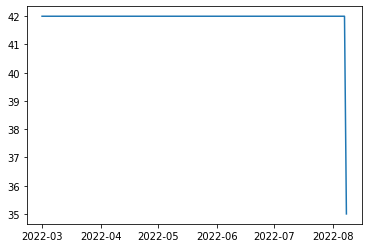

In [194]:
plt.plot((x[('Temp', 'min')]+x[('Temp', 'max')])/2)

In [139]:
temp_data['prp_rm']= temp_data['Property num'] +'_' + temp_data['room_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


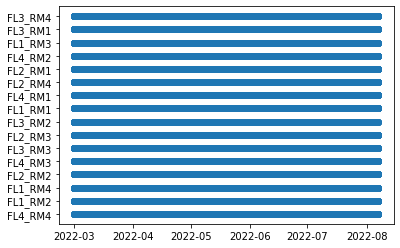

In [145]:
plt.scatter(anomaly_temp['date'], anomaly_temp['room_id'], label = "line 1")


In [141]:
# ana_prp_rm = temp_data[['prp_rm','date']]
# ana_prp_rm.columns

Index(['prp_rm', 'date'], dtype='object')

In [241]:
# plt.figure(figsize=(40,20))
# plt.scatter(ana_prp_rm['date'], ana_prp_rm['prp_rm'], color='r', marker='D')

In [8]:
DatasetFL4_RM2 = Exp_data1[['noted Date', 'Temp']]

In [9]:
DatasetFL4_RM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 29 to 230397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted Date  7207 non-null   object
 1   Temp        7207 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 168.9+ KB


In [10]:
  DatasetFL4_RM2

,noted Date,Temp
29,2022-03-01 00:29:00,46
46,2022-03-01 00:46:00,45
142,2022-03-01 02:22:00,45
150,2022-03-01 02:30:00,37
171,2022-03-01 02:51:00,41
...,...,...
230162,2022-08-07 20:02:00,42
230172,2022-08-07 20:12:00,37
230242,2022-08-07 21:22:00,40
230312,2022-08-07 22:32:00,36


In [11]:
DatasetFL4_RM2['Date'] = pd.to_datetime(DatasetFL4_RM2['noted Date']).dt.date


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
DatasetFL4_RM2.tail()

,noted Date,Temp,Date
230162,2022-08-07 20:02:00,42,2022-08-07
230172,2022-08-07 20:12:00,37,2022-08-07
230242,2022-08-07 21:22:00,40,2022-08-07
230312,2022-08-07 22:32:00,36,2022-08-07
230397,2022-08-07 23:57:00,43,2022-08-07


In [13]:
dataset1 = DatasetFL4_RM2.groupby('Date')['Temp'].mean().reset_index().fillna(0).set_index('Date')

In [14]:
type(dataset1)

pandas.core.frame.DataFrame

In [37]:
dataset1.head(20)

,Temp
Date,
2022-03-01,42.47
2022-03-02,42.48
2022-03-03,42.69
2022-03-04,41.81
2022-03-05,42.36
2022-03-06,42.30
2022-03-07,41.49
2022-03-08,41.76
2022-03-09,41.29


In [15]:
dataset1

,Temp
Date,
2022-03-01,42.47
2022-03-02,42.48
2022-03-03,42.69
2022-03-04,41.81
2022-03-05,42.36
...,...
2022-08-03,42.14
2022-08-04,41.05
2022-08-05,41.23


In [16]:
dataset1.describe()

,Temp
count,160.00
mean,42.06
std,0.58
min,40.56
25%,41.67
50%,42.07
75%,42.40
max,43.56


### Data decomose

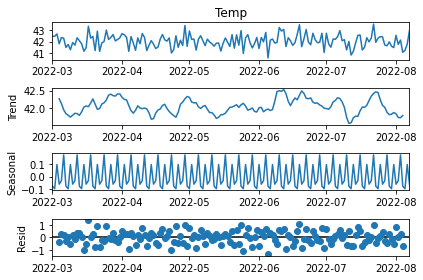

In [17]:
result = seasonal_decompose(dataset1['Temp'], model='additive', period=6)
result.plot()
plt.show()

### Checking randomness of data

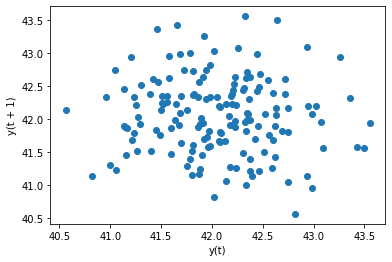

In [18]:
from pandas.plotting import lag_plot
lag_plot(dataset1['Temp'])
plt.show()

In [19]:
residue = result.resid

<AxesSubplot:xlabel='Date'>

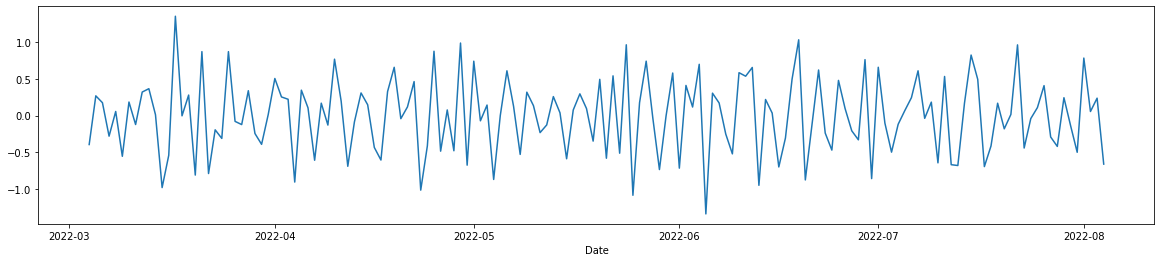

In [20]:
residue.plot(figsize=(20,4))

In [21]:
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='resid', ylabel='Count'>

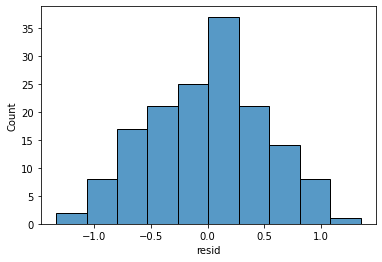

In [22]:
sns.histplot(residue)

In [23]:
mu = np.mean(residue)
sigma = np.std(residue)
mu, sigma

(-0.003214662062413384, 0.5153840871039183)

In [24]:
lowlim = mu - (3*sigma)
uplim = mu + (3*sigma)
lowlim,uplim

(-1.549366923374168, 1.5429375992493413)

In [25]:
# Anomalies in residue
anomalies = dataset1[(residue<lowlim) | residue > uplim]
anomalies

,Temp
Date,


In [26]:
from datetime import datetime

(19052.0, 19205.0)

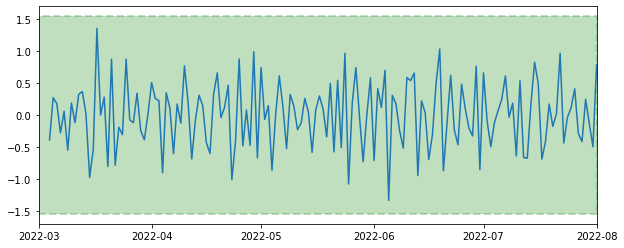

In [27]:
plt.figure(figsize=(10,4))
plt.plot(residue)

plt.fill_between([datetime(2022,1,1), datetime(2022,8,1)], lowlim, uplim, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2022,3,1), datetime(2022,8,1))

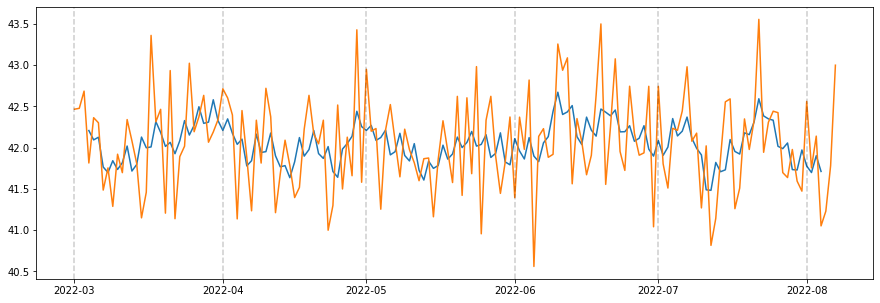

In [28]:
tr_se = result.trend + result.seasonal
plt.figure(figsize=(15,5))
plt.plot(tr_se)
plt.plot(dataset1)
for month in range(3,9):
    plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.2)

In [29]:
dataset1

,Temp
Date,
2022-03-01,42.47
2022-03-02,42.48
2022-03-03,42.69
2022-03-04,41.81
2022-03-05,42.36
...,...
2022-08-03,42.14
2022-08-04,41.05
2022-08-05,41.23


In [30]:
min(dataset1['Temp']),max(dataset1['Temp'])

(40.5609756097561, 43.55555555555556)

## Anomalies creation with Temp level > 42

In [31]:
dataset1['anomaly'] = np.where(dataset1['Temp']>42, 1, 0)
dataset1.head()

,Temp,anomaly
Date,,
2022-03-01,42.47,1
2022-03-02,42.48,1
2022-03-03,42.69,1
2022-03-04,41.81,0
2022-03-05,42.36,1


In [32]:
dataset1.index

Index([2022-03-01, 2022-03-02, 2022-03-03, 2022-03-04, 2022-03-05, 2022-03-06,
       2022-03-07, 2022-03-08, 2022-03-09, 2022-03-10,
       ...
       2022-07-29, 2022-07-30, 2022-07-31, 2022-08-01, 2022-08-02, 2022-08-03,
       2022-08-04, 2022-08-05, 2022-08-06, 2022-08-07],
      dtype='object', name='Date', length=160)

In [33]:
ana_ind = dataset1[dataset1['anomaly']==1]

In [34]:
len(ana_ind)

84

In [35]:
dataset1.drop('anomaly',axis=1,inplace=True)

### Plot with Anomalies

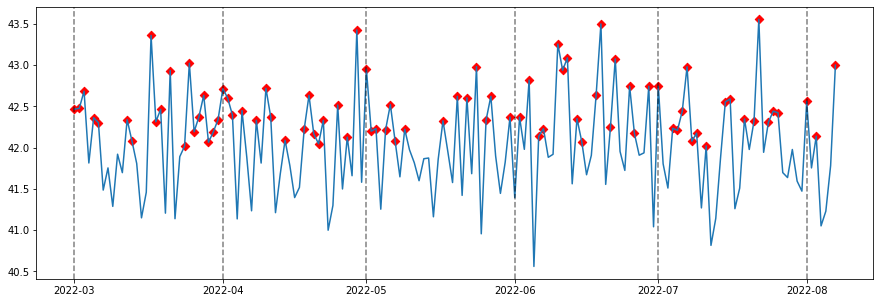

In [36]:
# tr_se = result.trend + result.seasonal
plt.figure(figsize=(15,5))
# plt.plot(tr_se)
plt.plot(dataset1)
for month in range(3,9):
    plt.axvline(datetime(2022, month, 1), color = 'k', linestyle ='--', alpha=0.5)

    
plt.scatter(ana_ind.index, ana_ind['Temp'], color='r', marker='D')

# Exponential Smoothing - SimpleExpSmoothing

In [57]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(dataset1['Temp'])

fit_model = model.fit(smoothing_level=0.4, optimized=False)

C:\Users\sackesar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

  warnings.warn('No frequency information was'


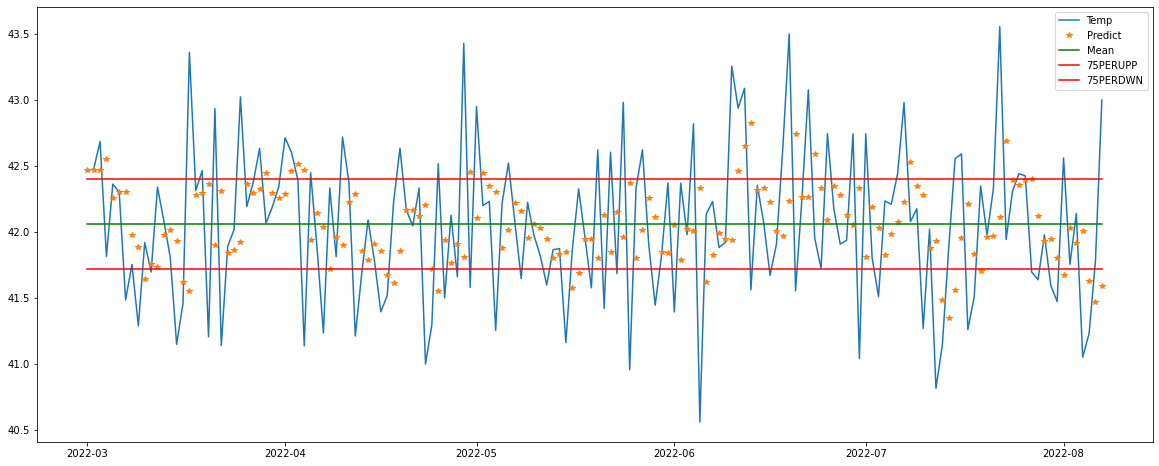

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(dataset1['Temp'],label='Temp')
plt.plot(fit_model.fittedvalues, '*', label='Predict') 
plt.plot(dataset1.index,([42.06]*len(dataset1['Temp'])), '-', color = 'green', label='Mean') 
plt.plot(dataset1.index,([42.40]*len(dataset1['Temp'])), '-', color = 'red', label='75PERUPP') 
plt.plot(dataset1.index,([41.72]*len(dataset1['Temp'])), '-', color = 'red', label='75PERDWN') 
plt.legend()

plt.show()

In [61]:
#Mean Absolute Percentage Error - % of error with exponential model 
get_MAPE(dataset1['Temp'].values,fit_model.fittedvalues)

1.2

In [62]:
# Root Mean Squeare Error - Standard Deviation of errors 

np.sqrt(mean_squared_error(dataset1['Temp'].values,fit_model.fittedvalues))

0.6487619445504145

In [63]:
dataset1['Pred_Temp'] = fit_model.fittedvalues

In [64]:
dataset1.tail()

,Temp,Pred_Temp
Date,,
2022-08-03,42.14,41.92
2022-08-04,41.05,42.01
2022-08-05,41.23,41.63
2022-08-06,41.78,41.47
2022-08-07,43.00,41.59


In [76]:
forecast_val = fit_model.forecast(10)

In [77]:
forecast_val

2022-08-08   42.16
2022-08-09   42.16
2022-08-10   42.16
2022-08-11   42.16
2022-08-12   42.16
2022-08-13   42.16
2022-08-14   42.16
2022-08-15   42.16
2022-08-16   42.16
2022-08-17   42.16
Freq: D, dtype: float64

In [67]:
dataset1

,Temp,Pred_Temp
Date,,
2022-03-01,42.47,42.47
2022-03-02,42.48,42.47
2022-03-03,42.69,42.47
2022-03-04,41.81,42.56
2022-03-05,42.36,42.26
...,...,...
2022-08-03,42.14,41.92
2022-08-04,41.05,42.01
2022-08-05,41.23,41.63


# Decomposition of time -series 

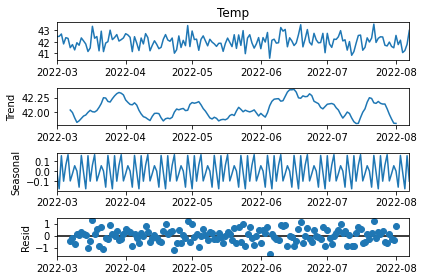

In [69]:
decompose_data = seasonal_decompose(dataset1.Temp, model="additive", period=12)
decompose_data.plot()
plt.show()

In [70]:
#Visualizing the residual.

residual = decompose_data.resid
#residual.plot()
residual.describe()

count   148.00
mean     -0.00
std       0.56
min      -1.54
25%      -0.39
50%       0.01
75%       0.39
max       1.30
Name: resid, dtype: float64

<AxesSubplot:xlabel='Date'>

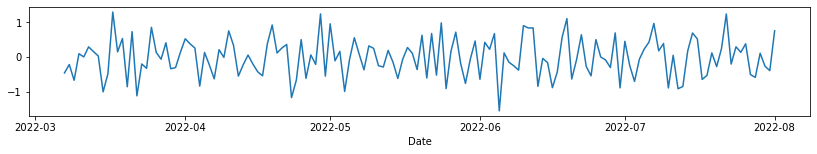

In [71]:
residual.plot(figsize=(14,2))

# Dicky Fuller Test

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
adfuller_result = adfuller(dataset1.Temp, autolag = None)

In [74]:
adfuller_output = pd.Series(adfuller_result[0:4],index=['Test Statistics', 'p-value', 'Lggs Used', 'Number of observations'])

In [75]:
# Obervation : p-value < 0.05 --> Time-series is stationary otherwise time-series in not stationary

print(adfuller_output)

Test Statistics           -3.51

p-value                    0.01

Lggs Used                 14.00

Number of observations   145.00

dtype: float64


In [33]:
# Data is stationary - We will use this to find if there is any trend in Temp